<a href="https://colab.research.google.com/github/Truomghoccode/Bai-Tap-Lon/blob/main/Climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Khám phá và làm sạch dữ liệu




### khai báo thư viện cần thiết

In [239]:
#khai bao thu vien
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import urllib.request
import xarray as xr
import calendar
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [240]:
df = pd.read_csv('Data.csv')
df.head()

province  max  min  wind wind_d  rain  humidi  cloud  pressure        date
0   Ha Noi   19   12     6    NNE   0.0      70     44      1025  01/01/2009
1   Ha Noi   18   12     6    ESE   0.5      65     28      1025  02/01/2009
2   Ha Noi   20   13     5    ESE   0.7      74     40      1022  03/01/2009
3   Ha Noi   25   12     5    SSW   0.0      81     46      1018  04/01/2009
4   Ha Noi   23   14     5      S   1.3      90     75      1017  05/01/2009

### kiểm tra dữ liệu và làm sạch

In [241]:
# tạo ra một bảng thống kê mô tả các cột số
df.describe()

max          min         wind         rain       humidi  \
count  4549.000000  4549.000000  4549.000000  4549.000000  4549.000000   
mean     29.489998    21.721257     8.382282     4.177028    74.206419   
std       6.217772     4.911990     3.186597     8.931418    10.925099   
min       7.000000     2.000000     2.000000     0.000000    28.000000   
25%      25.000000    19.000000     6.000000     0.000000    68.000000   
50%      30.000000    23.000000     8.000000     0.900000    76.000000   
75%      34.000000    26.000000    10.000000     4.500000    82.000000   
max      45.000000    32.000000    25.000000   203.200000    97.000000   

             cloud     pressure  
count  4549.000000  4549.000000  
mean     50.408661  1011.211695  
std      26.183295     6.898611  
min       0.000000   993.000000  
25%      30.000000  1005.000000  
50%      49.000000  1011.000000  
75%      71.000000  1016.000000  
max     100.000000  1037.000000

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  4549 non-null   object 
 1   max       4549 non-null   int64  
 2   min       4549 non-null   int64  
 3   wind      4549 non-null   int64  
 4   wind_d    4549 non-null   object 
 5   rain      4549 non-null   float64
 6   humidi    4549 non-null   int64  
 7   cloud     4549 non-null   int64  
 8   pressure  4549 non-null   int64  
 9   date      4549 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 355.5+ KB


In [243]:
df.isna().sum()


province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

- Dữ liệu sạch

- kiểm tra các kiểu dữ liệu trong data


In [244]:
df.dtypes

province     object
max           int64
min           int64
wind          int64
wind_d       object
rain        float64
humidi        int64
cloud         int64
pressure      int64
date         object
dtype: object

### tách dữ liệu để trực quan hóa


In [245]:
# Tạo một DataFrame mới có tên là df2 từ cột date của DataFrame df
df2 = pd.DataFrame(df,columns=['date'])

# Chuyển đổi cột date sang định dạng ngày tháng năm
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Thêm cột year và month lấy từ cột date
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

# Lấy các giá trị duy nhất của cột year và lưu vào biến years
years = df['year'].unique()

# Hiển thị 15 dòng đầu tiên của DataFrame df
df.head(15)


province  max  min  wind wind_d  rain  humidi  cloud  pressure       date  \
0    Ha Noi   19   12     6    NNE   0.0      70     44      1025 2009-01-01   
1    Ha Noi   18   12     6    ESE   0.5      65     28      1025 2009-01-02   
2    Ha Noi   20   13     5    ESE   0.7      74     40      1022 2009-01-03   
3    Ha Noi   25   12     5    SSW   0.0      81     46      1018 2009-01-04   
4    Ha Noi   23   14     5      S   1.3      90     75      1017 2009-01-05   
5    Ha Noi   23   15     5      E   2.2      88     59      1018 2009-01-06   
6    Ha Noi   15   13     9    NNE   1.1      85     95      1023 2009-01-07   
7    Ha Noi   15   12     8      E   0.5      78     91      1026 2009-01-08   
8    Ha Noi   19   11    10     SE   0.1      61     23      1029 2009-01-09   
9    Ha Noi   22    8     6    ENE   0.0      50      2      1027 2009-01-10   
10   Ha Noi   23    8     4      E   0.0      46      1      1024 2009-01-11   
11   Ha Noi   22    9     6     SE   0.0      51      5      1028 2009-01-12   
12   Ha Noi   23    8     6     SE   0.0      45      3      1030 2009-01-13   
13   Ha Noi   22    9     5    NNE   0.0      45      4      1029 2009-01-14   
14   Ha Noi   23    9     5    ENE   0.0      41      8      1027 2009-01-15   

    year  month  
0   2009      1  
1   2009      1  
2   2009      1  
3   2009      1  
4   2009      1  
5   2009      1  
6   2009      1  
7   2009      1  
8   2009      1  
9   2009      1  
10  2009      1  
11  2009      1  
12  2009      1  
13  2009      1  
14  2009      1

In [246]:
# Xóa các dòng trùng lặp trong DataFrame df dựa trên cột year và month
df = df.drop_duplicates(subset=['year','month'])

# Tạo một DataFrame mới có tên là df2 bằng cách xoay DataFrame df
df2 = df.pivot(index='month',columns='year' , values = 'max')


In [247]:
# Nhập thư viện numpy
import numpy as np

# Nhập LinearRegression từ thư viện scikit-learn
from sklearn.linear_model import LinearRegression

# Thêm cột avg_temp vào DataFrame df bằng cách tính trung bình cộng của cột max và min
df = df.assign(avg_temp=(df['max'] + df['min']) / 2)

# Hiển thị 5 dòng đầu tiên của DataFrame df
df.head()


province  max  min  wind wind_d  rain  humidi  cloud  pressure       date  \
0     Ha Noi   19   12     6    NNE   0.0      70     44      1025 2009-01-01   
31    Ha Noi   19   14     3    ENE   0.8      91     85      1018 2009-02-01   
59    Ha Noi   17   17     7    NNE   5.1      80    100      1017 2009-03-01   
90    Ha Noi   24   17     6      E   3.1      85     99      1017 2009-04-01   
120   Ha Noi   30   22     9    ESE   1.6      81     61      1014 2009-05-01   

     year  month  avg_temp  
0    2009      1      15.5  
31   2009      2      16.5  
59   2009      3      17.0  
90   2009      4      20.5  
120  2009      5      26.0

# Trực quan hóa dữ liệu

- Sử dụng biểu đồ đường để có thể thấy được sự biến đổi qua các năm

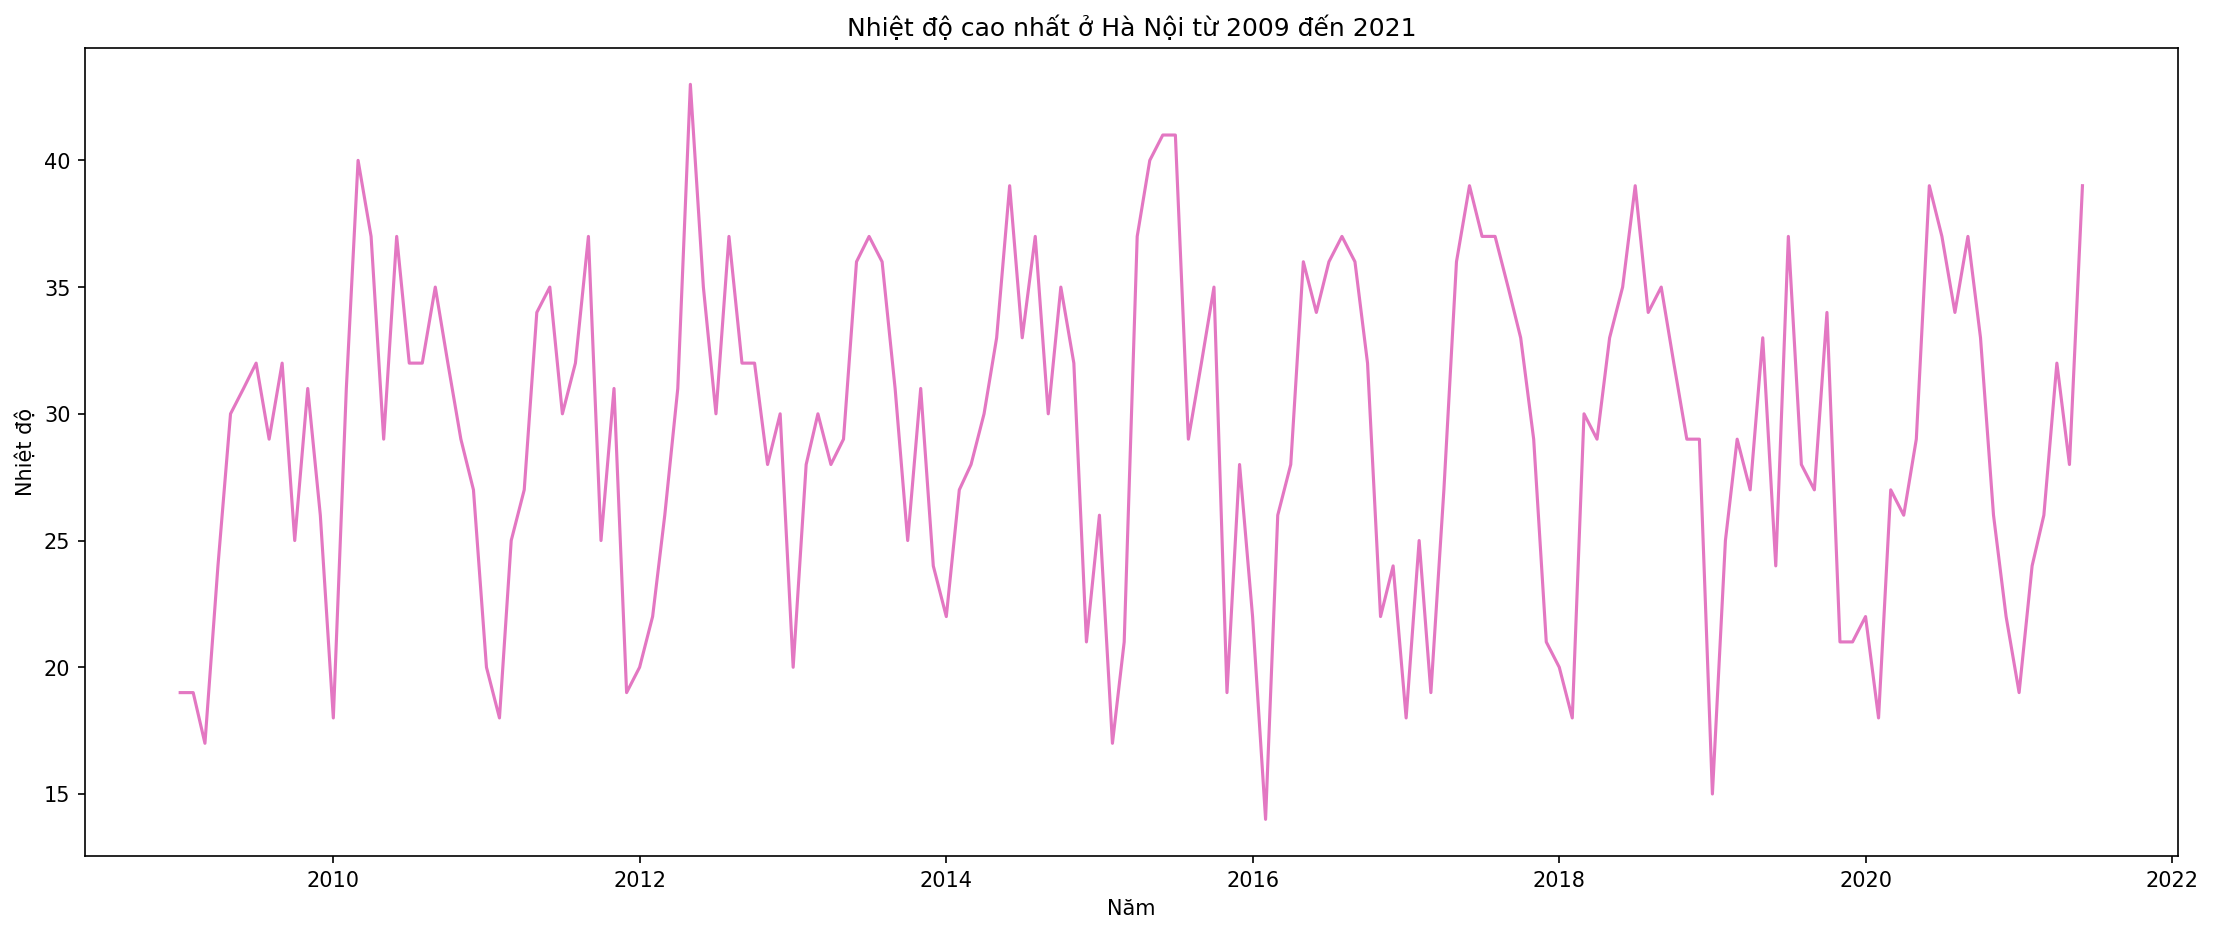

In [248]:
# Định nghĩa hàm plot_df để vẽ biểu đồ đường
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ', dpi=150, color="blue"):
    # Tạo một hình ảnh mới với kích thước và độ phân giải cho trước
    plt.figure(figsize=(18,7), dpi=dpi)
    
    # Vẽ biểu đồ đường với giá trị x và y cho trước và màu sắc cho trước
    plt.plot(x, y, color=color)
    
    # Đặt tiêu đề, nhãn trục x và nhãn trục y cho biểu đồ
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    
    # Hiển thị biểu đồ
    plt.show()

# Gọi hàm plot_df để vẽ biểu đồ đường cho cột max của DataFrame df
plot_df(df,x=df['date'], y=df['max'], title='Nhiệt độ cao nhất ở Hà Nội từ 2009 đến 2021', color="tab:pink")


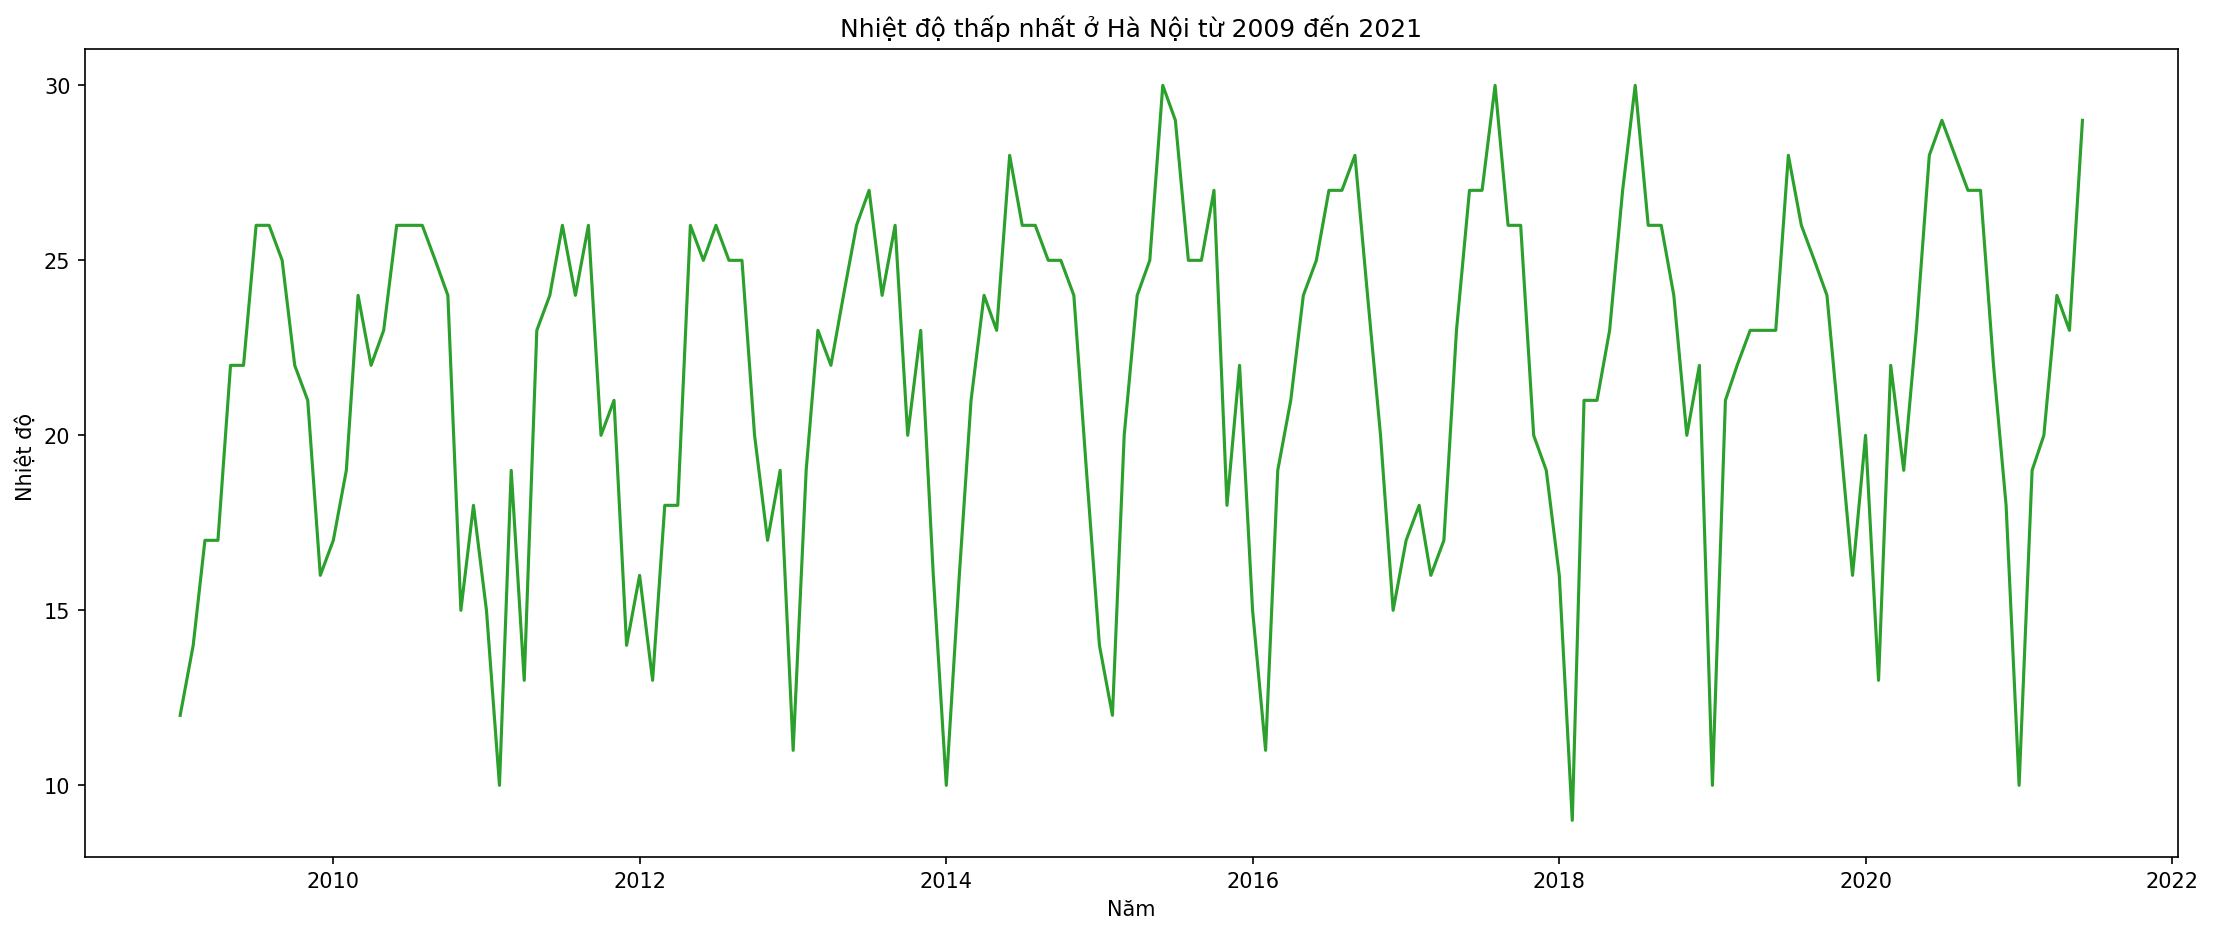

In [249]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ ', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['min'], title='Nhiệt độ thấp nhất ở Hà Nội từ 2009 đến 2021', color="tab:green")

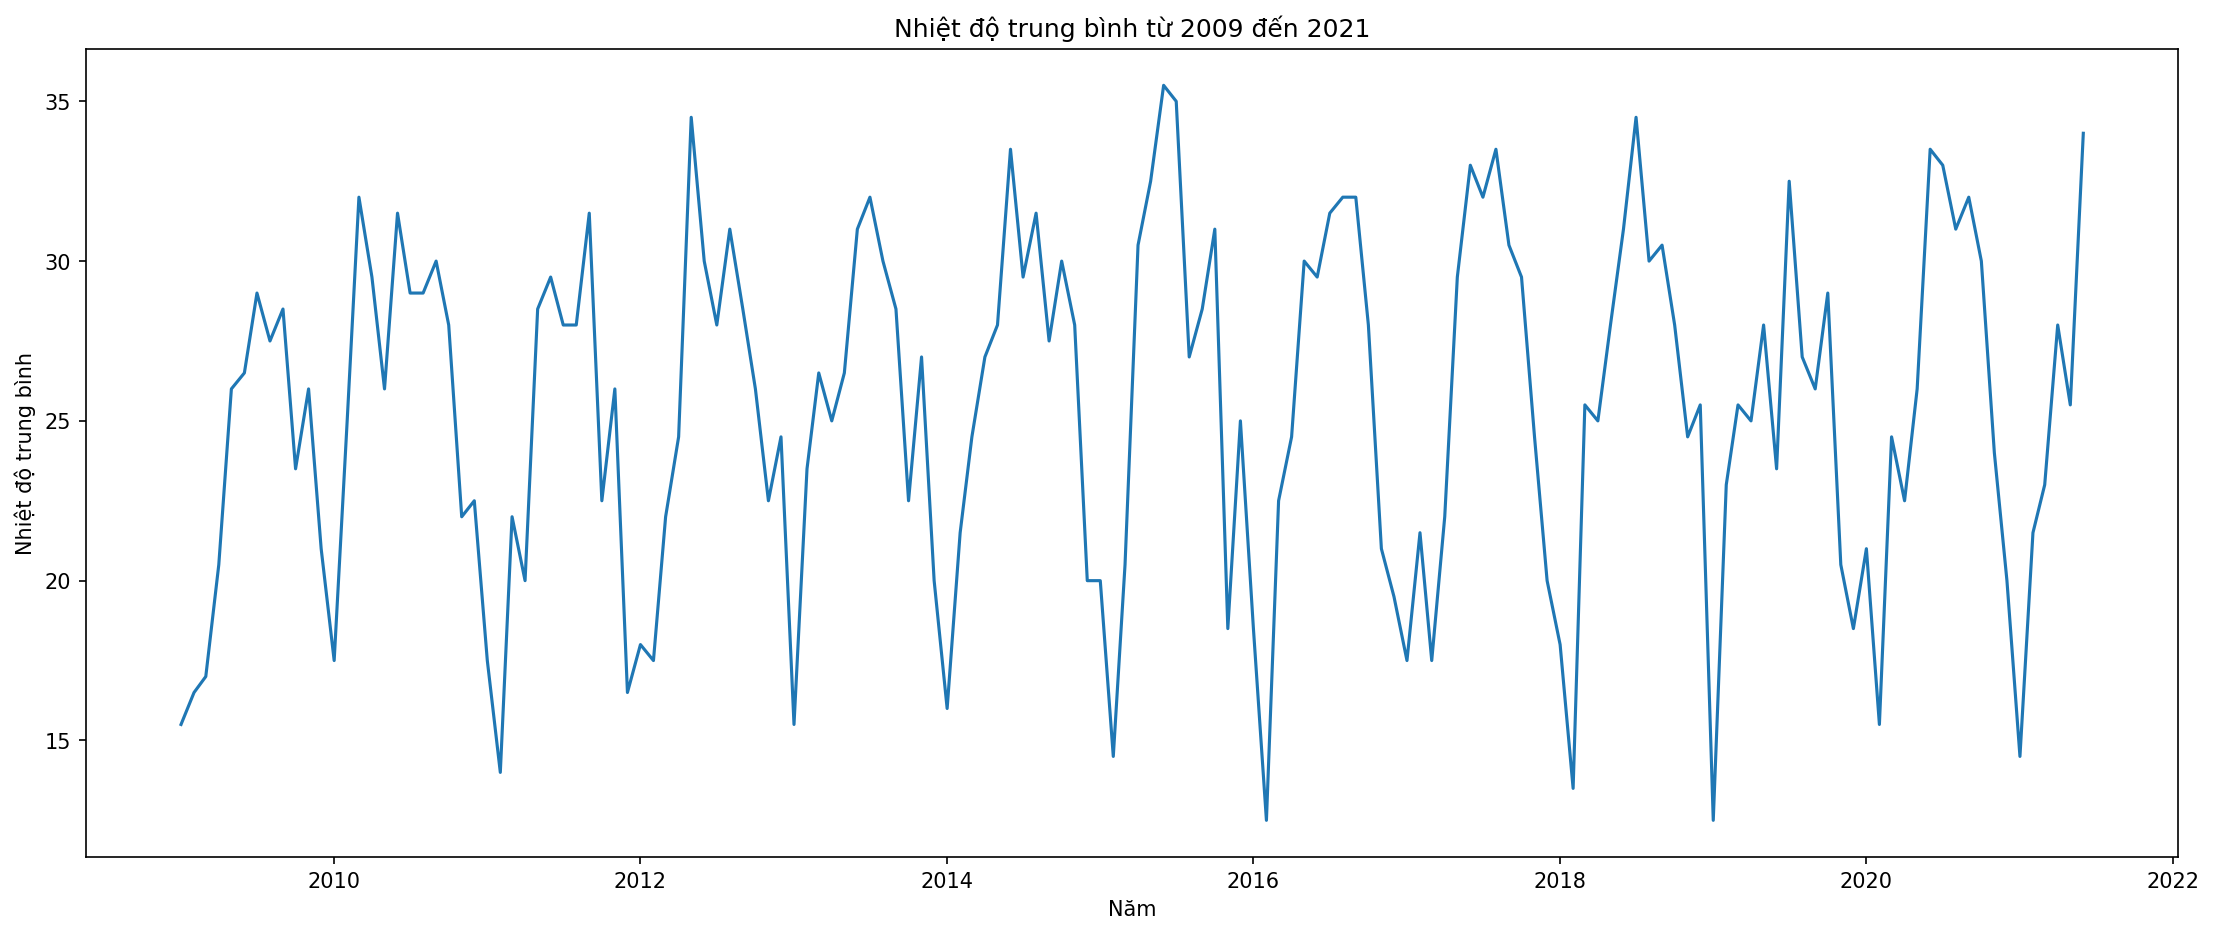

In [250]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ trung bình', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['avg_temp'], title='Nhiệt độ trung bình từ 2009 đến 2021', color="tab:blue")

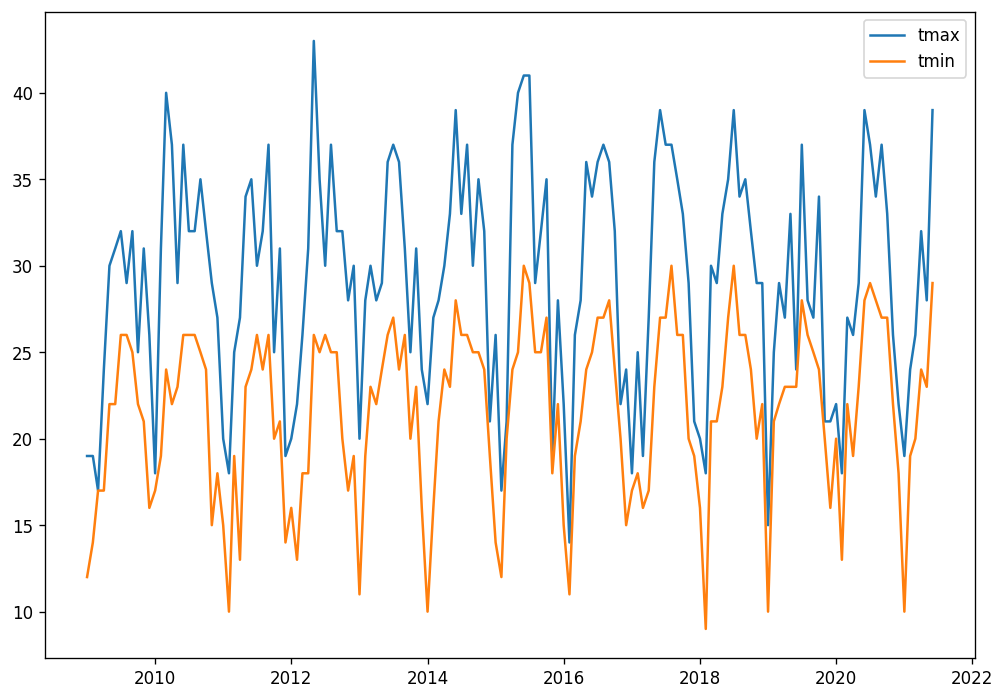

In [251]:
a = df['max']
b = df['min']
d = df['date']
plt.plot(d,a , label = "tmax")
plt.plot(d,b , label = "tmin")
plt.legend()

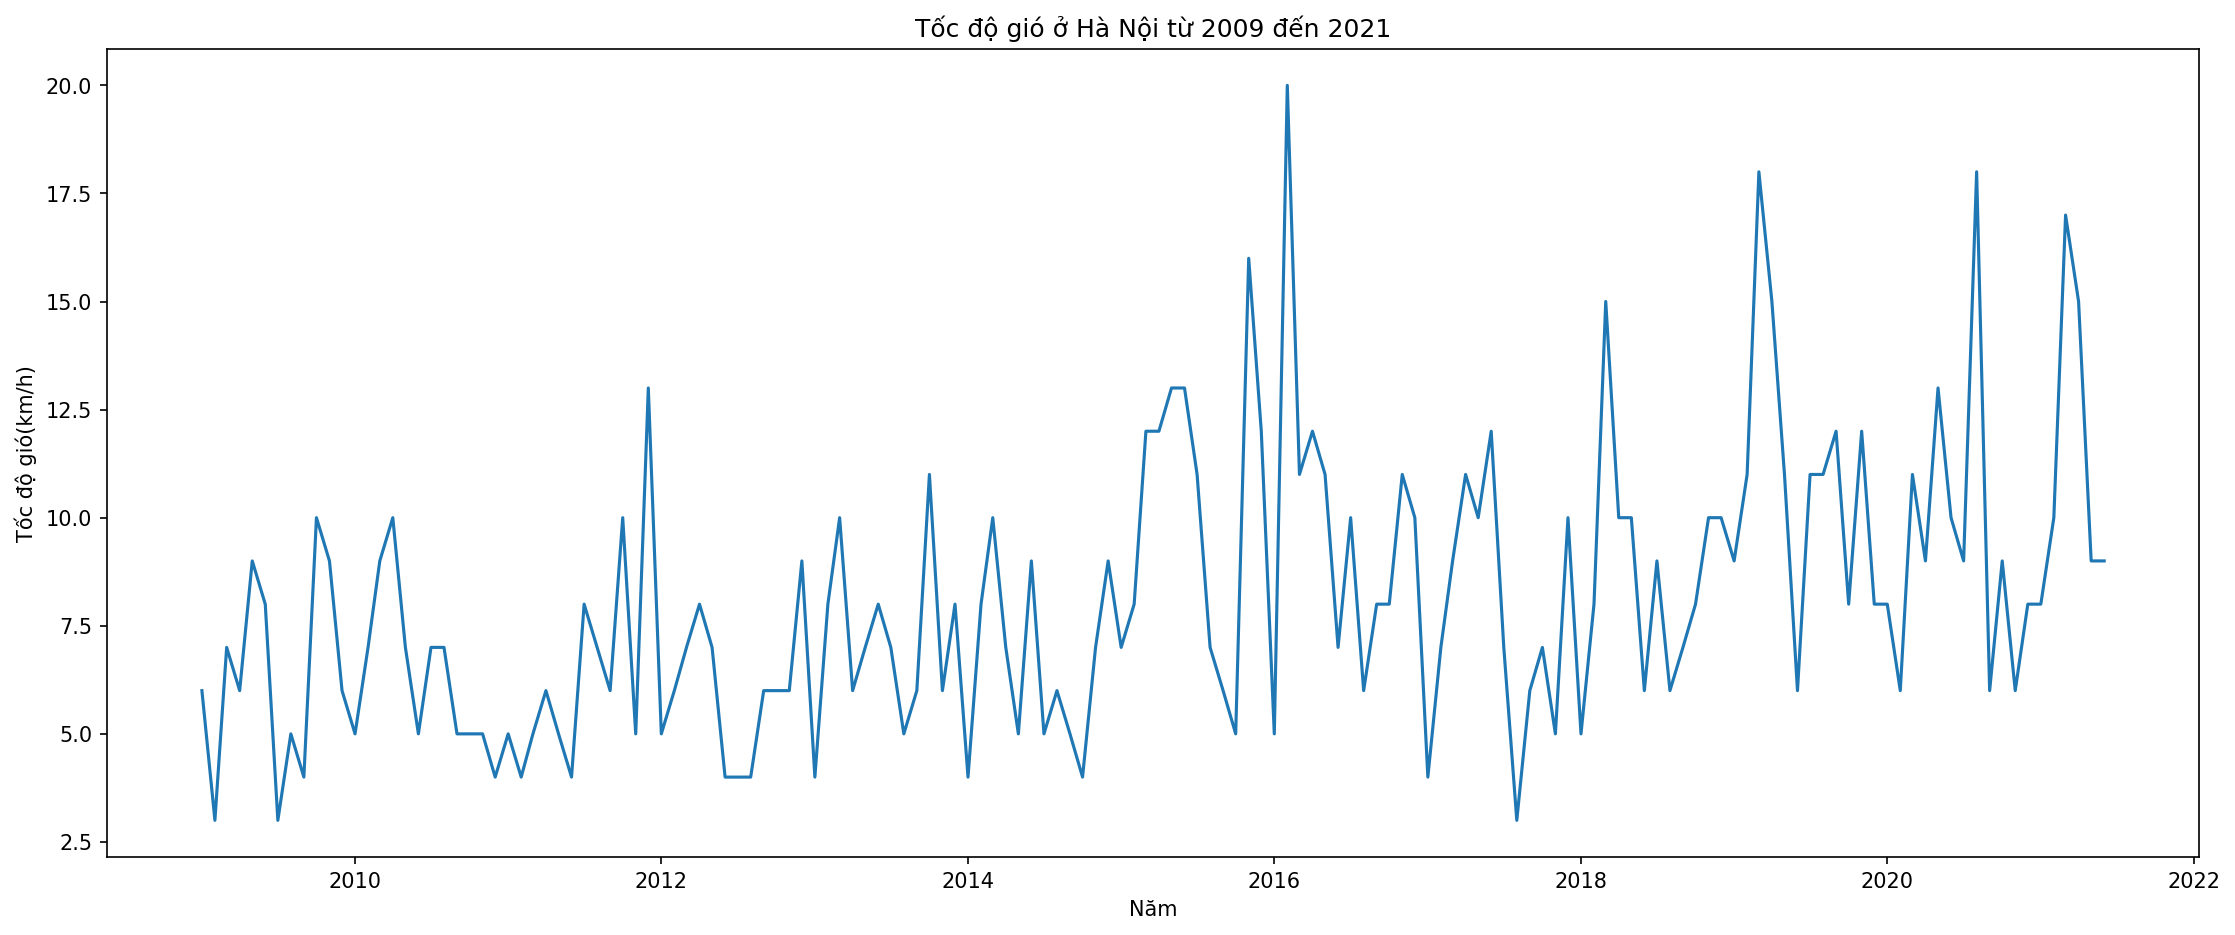

In [252]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Tốc độ gió(km/h)', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['wind'], title='Tốc độ gió ở Hà Nội từ 2009 đến 2021', color="tab:blue")

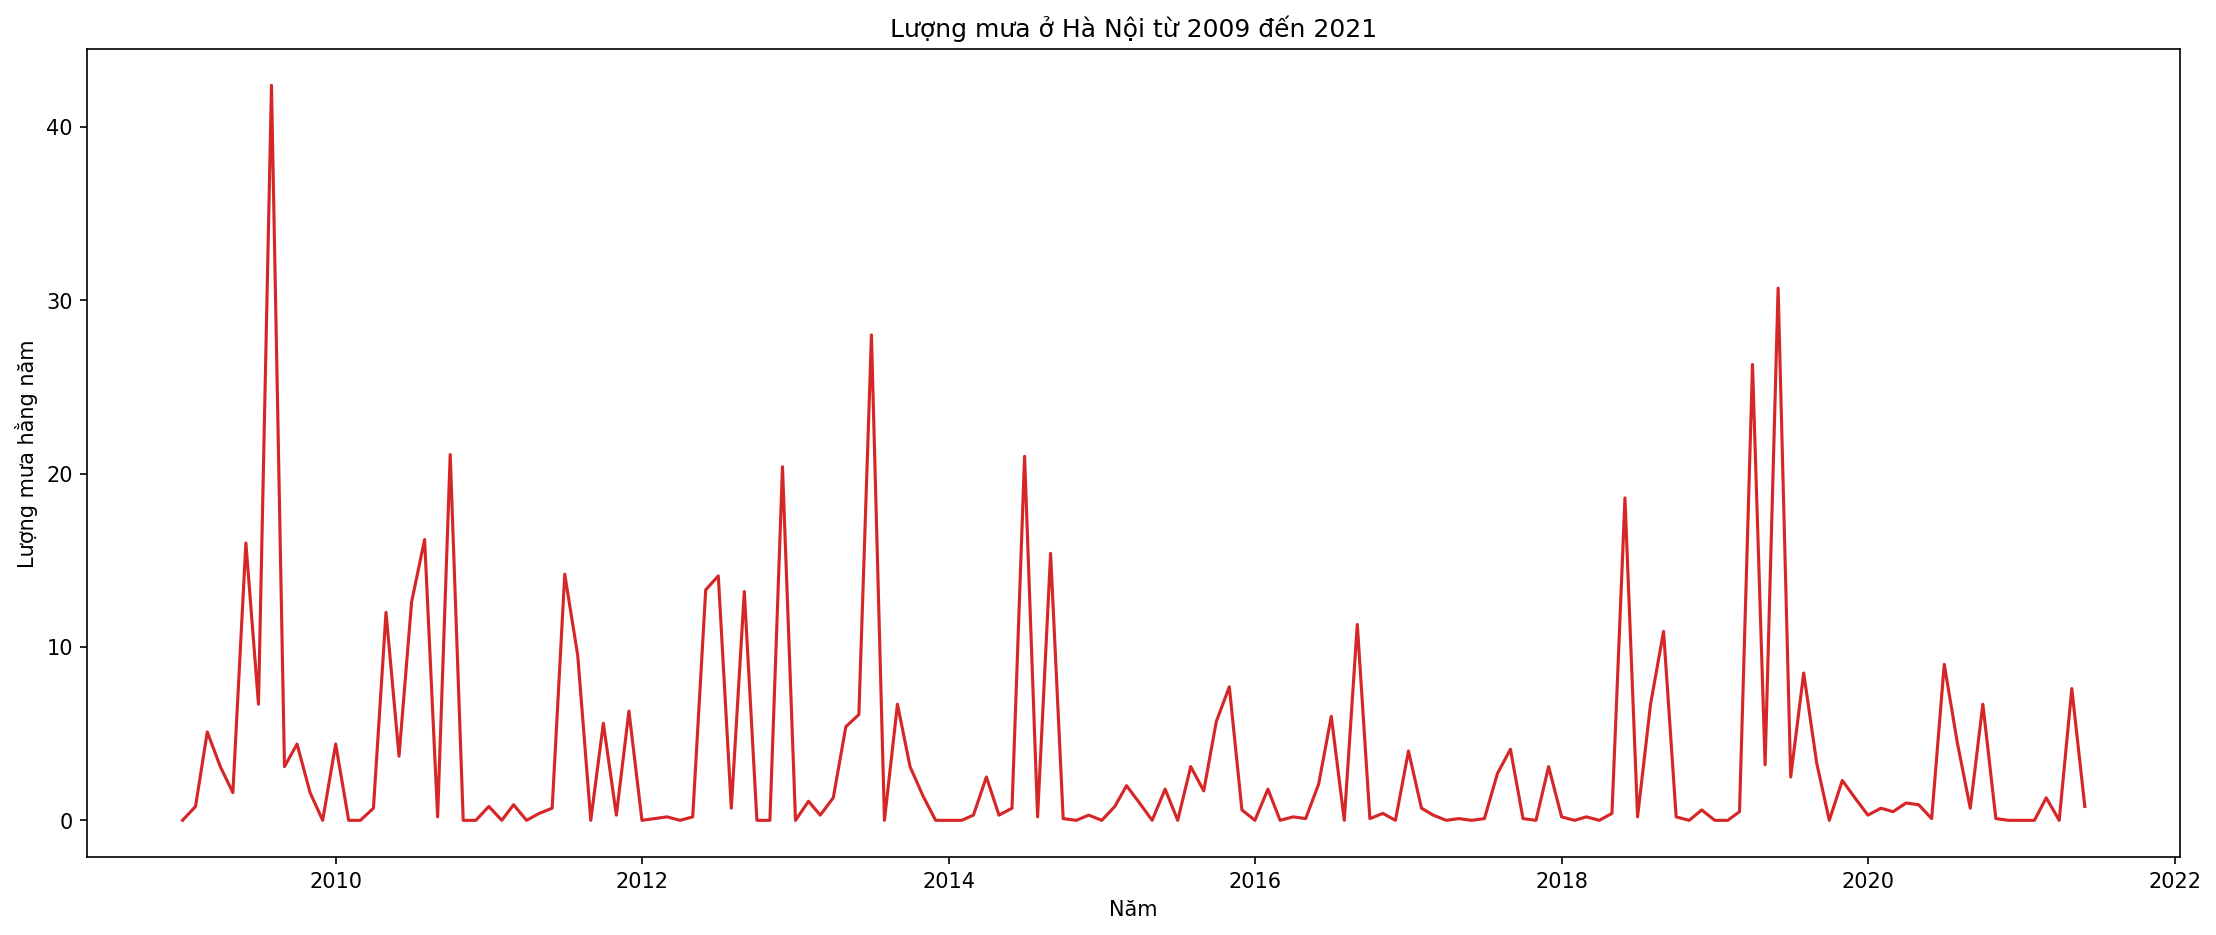

In [253]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mưa hằng năm', dpi=150, color="red"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['rain'], title='Lượng mưa ở Hà Nội từ 2009 đến 2021', color="tab:red")

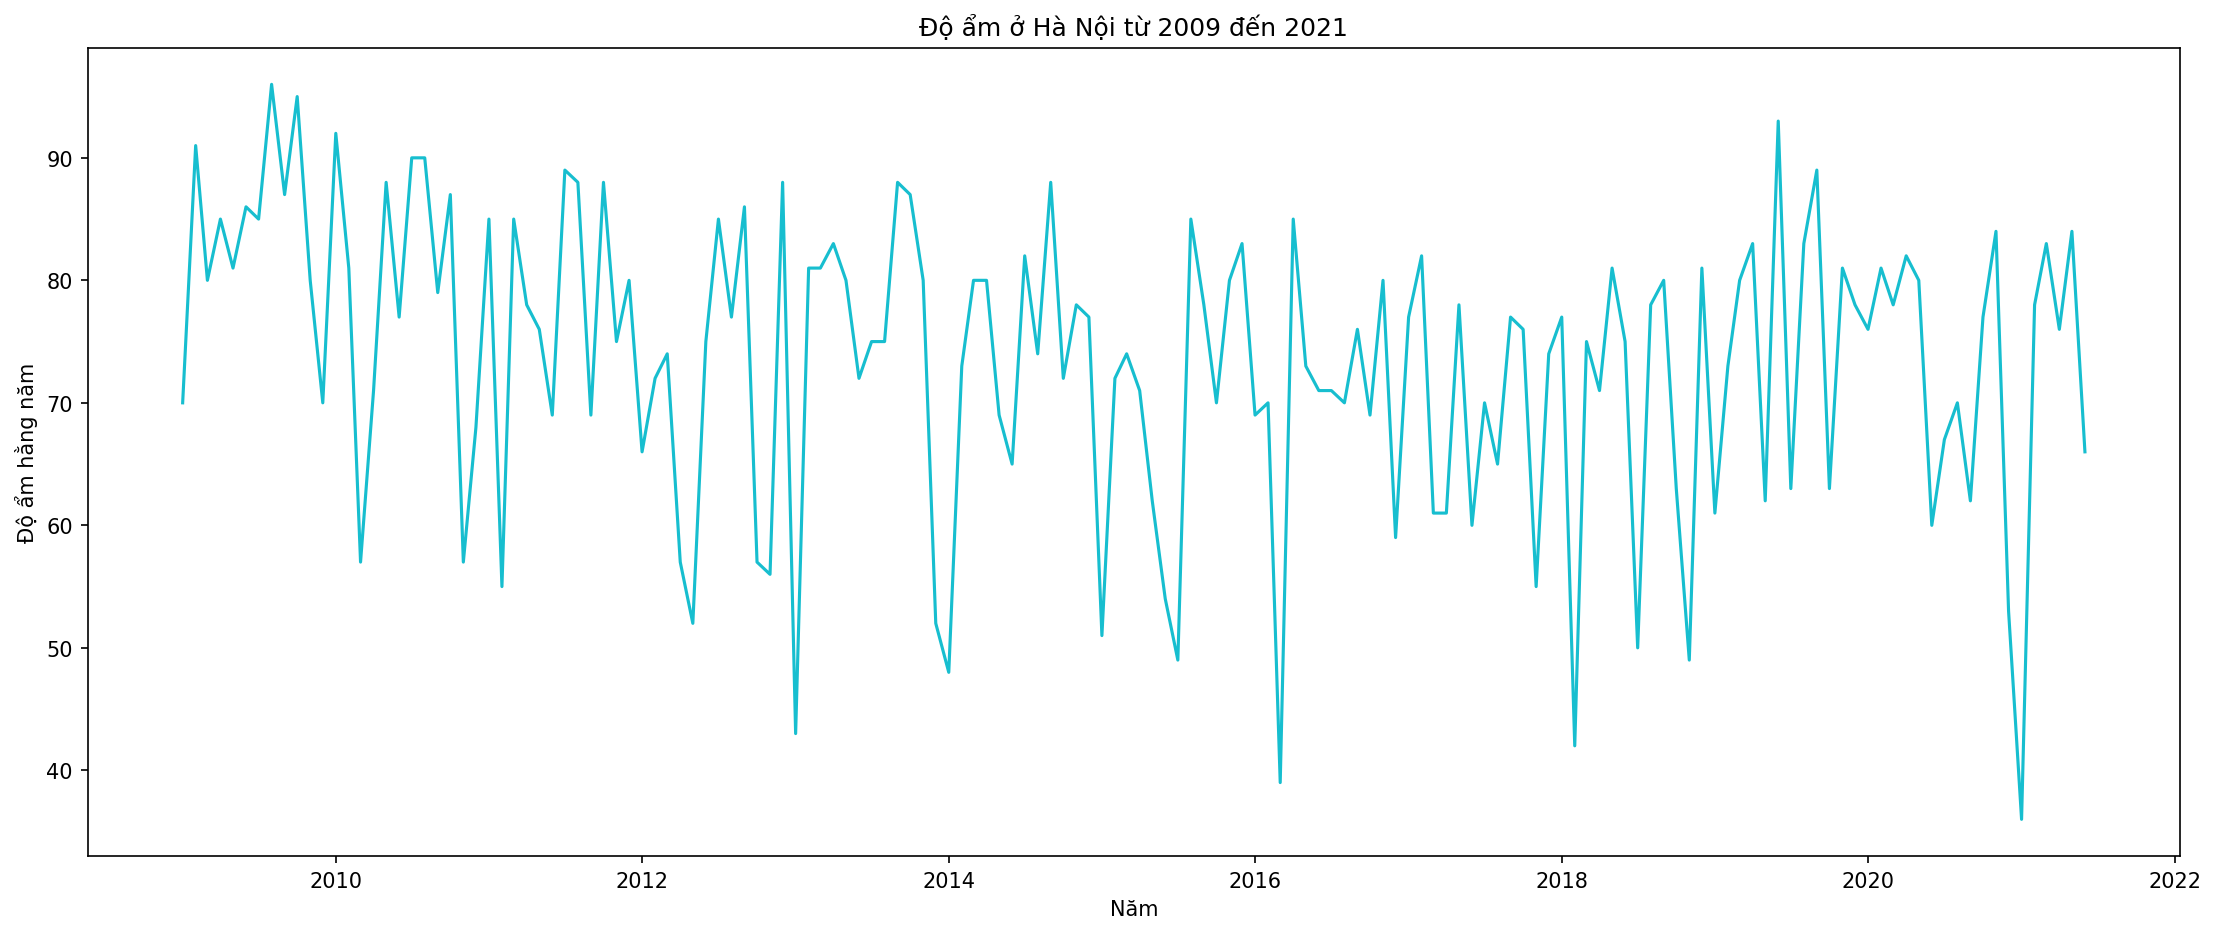

In [254]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Độ ẩm hằng năm', dpi=150, color="cyan"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['humidi'], title='Độ ẩm ở Hà Nội từ 2009 đến 2021', color="tab:cyan")

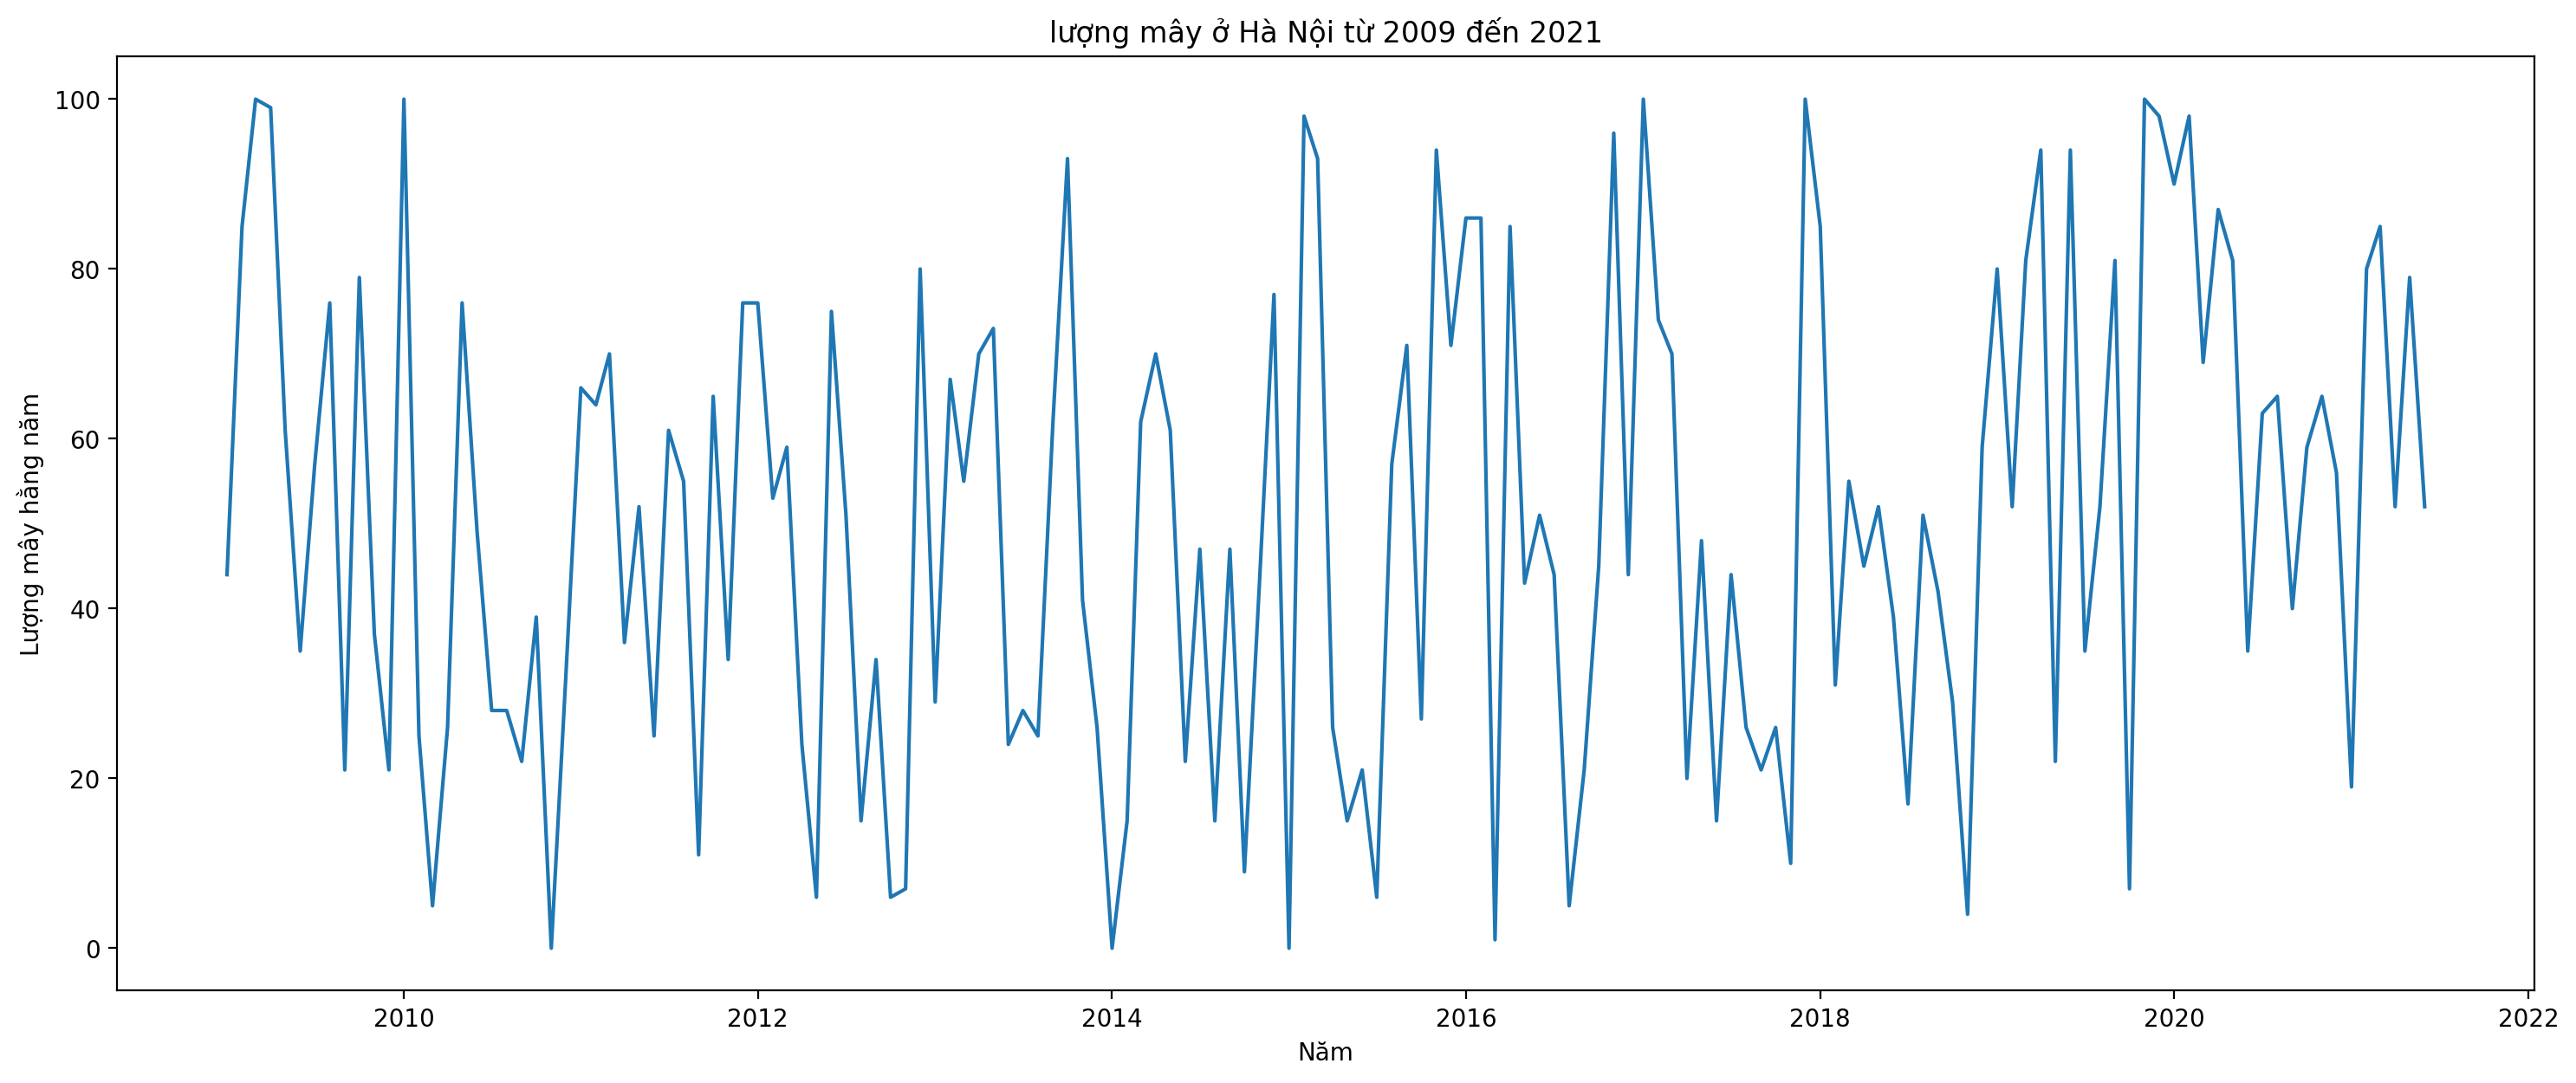

In [255]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mây hằng năm', dpi=200, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['cloud'], title='lượng mây ở Hà Nội từ 2009 đến 2021', color="tab:blue")

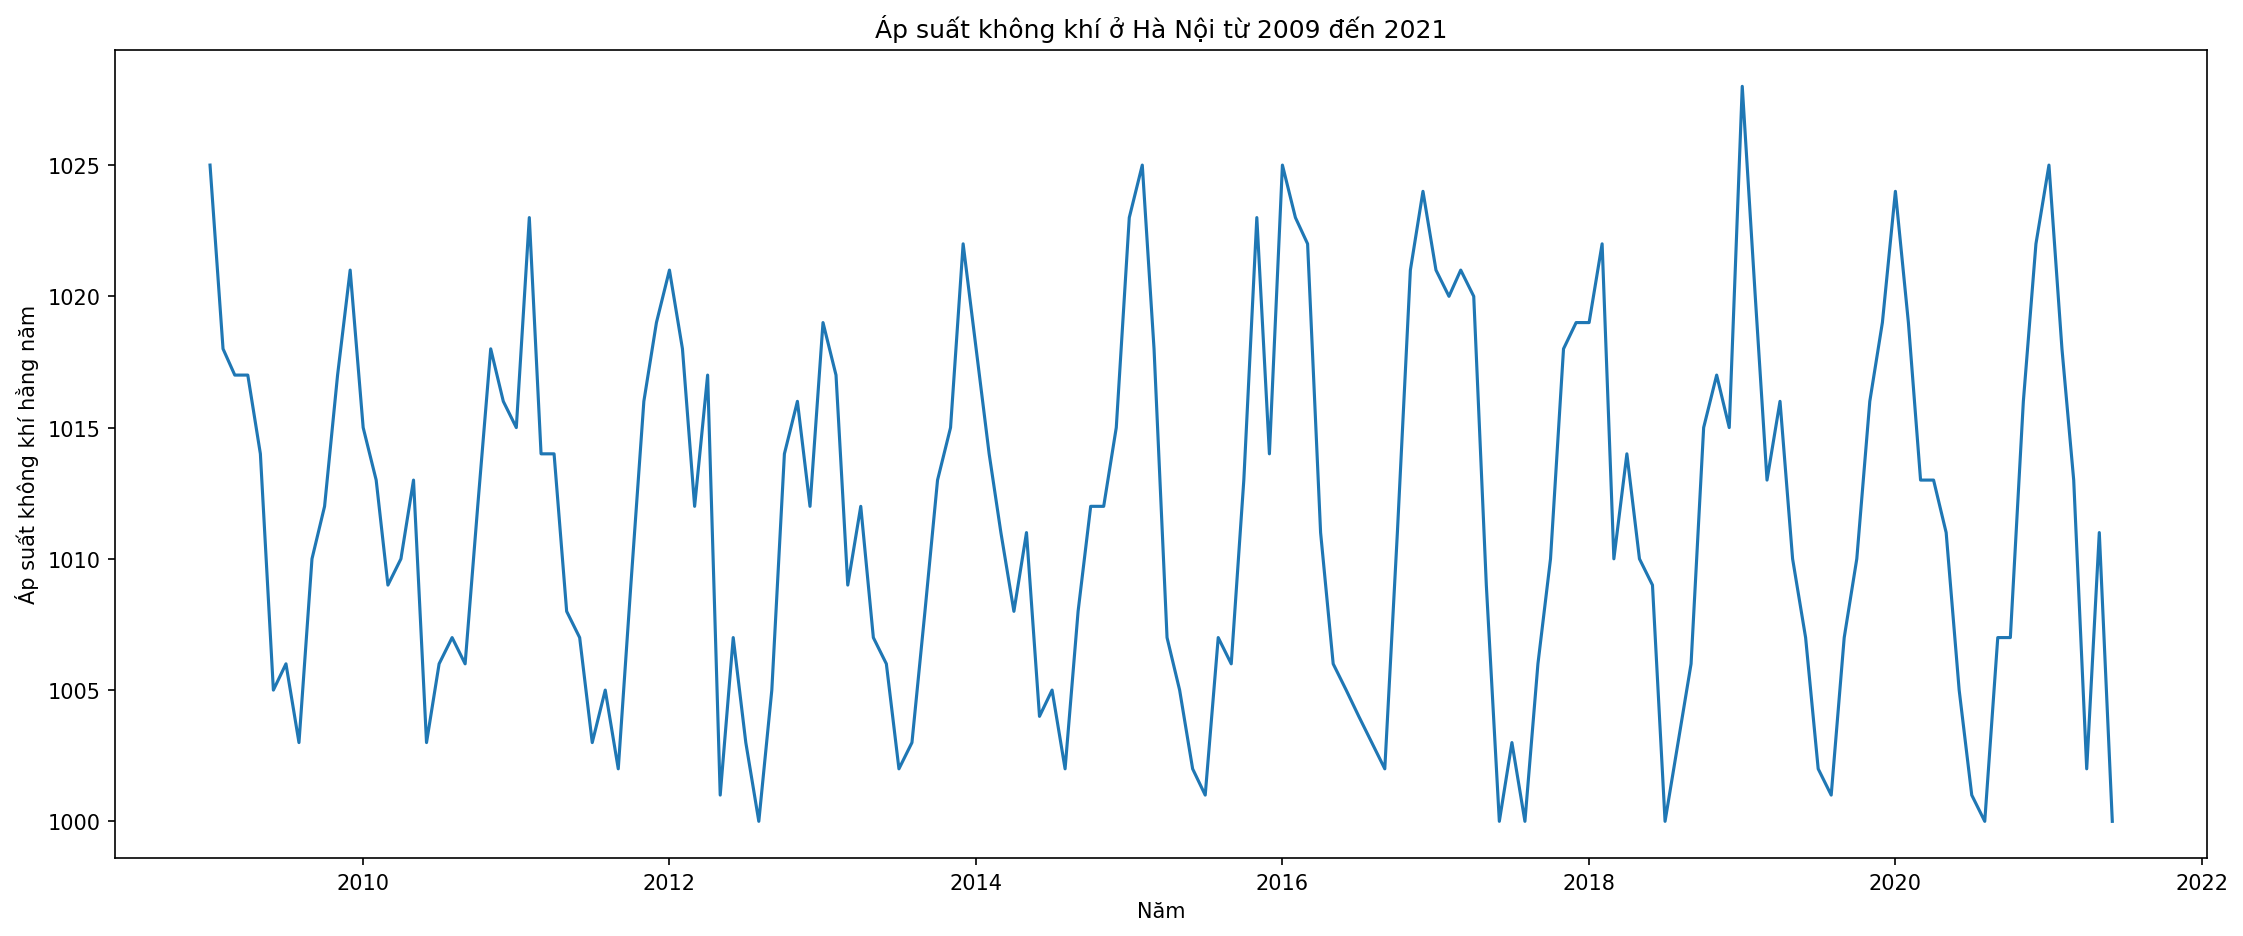

In [256]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Áp suất không khí hằng năm', dpi=150, color="blue"):
    plt.figure(figsize=(18,7), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['pressure'], title='Áp suất không khí ở Hà Nội từ 2009 đến 2021', color="tab:blue")

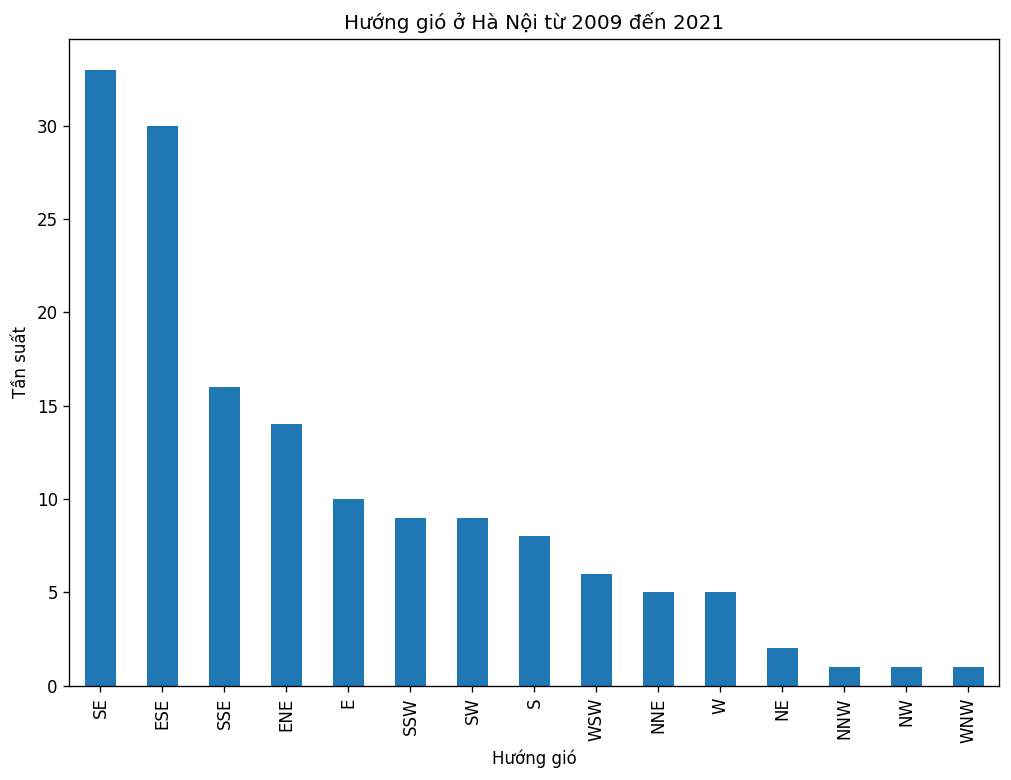

In [257]:
# Tạo một Series mới từ cột wind_d của DataFrame df
series = pd.Series(df['wind_d'])

# Tính tần suất xuất hiện của các giá trị trong Series
frequency = series.value_counts()

# Vẽ biểu đồ cột cho tần suất
frequency.plot.bar()

# Đặt nhãn trục x và trục y cho biểu đồ
plt.xlabel('Hướng gió')
plt.ylabel('Tần suất')

# Đặt tiêu đề cho biểu đồ
plt.title('Hướng gió ở Hà Nội từ 2009 đến 2021')

# Hiển thị biểu đồ
plt.show()


# Xác định xu hướng khí hậu theo hằng năm và hằng tháng


### Xu hướng nhiệt độ

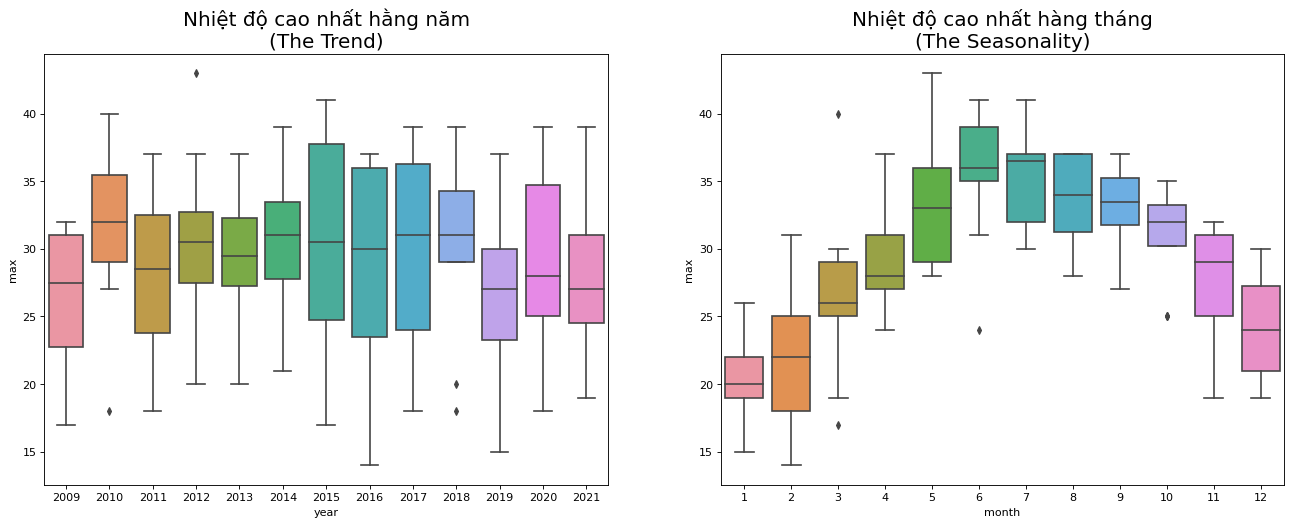

In [258]:
# Tạo một hình ảnh mới với hai trục con và kích thước và độ phân giải cho trước
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)

# Vẽ biểu đồ hộp cho cột max theo cột year trên trục con thứ nhất
sns.boxplot(x='year', y='max', data=df, ax=axes[0])

# Vẽ biểu đồ hộp cho cột max theo cột month trên trục con thứ hai
sns.boxplot(x='month', y='max', data=df)

# Đặt tiêu đề cho hai trục con
axes[0].set_title('Nhiệt độ cao nhất hằng năm\n(The Trend)', fontsize=18)
axes[1].set_title('Nhiệt độ cao nhất hàng tháng\n(The Seasonality)', fontsize=18)

# Hiển thị biểu đồ
plt.show()


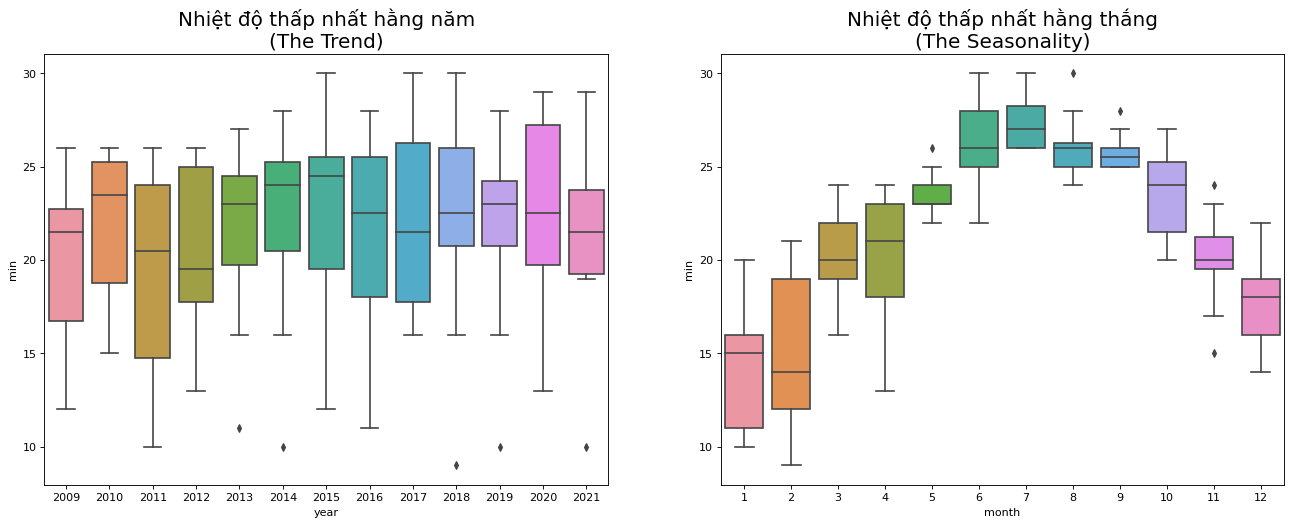

In [259]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='min', data=df, ax=axes[0])
sns.boxplot(x='month', y='min', data=df)

axes[0].set_title('Nhiệt độ thấp nhất hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Nhiệt độ thấp nhất hằng thắng\n(The Seasonality)', fontsize=18)
plt.show()

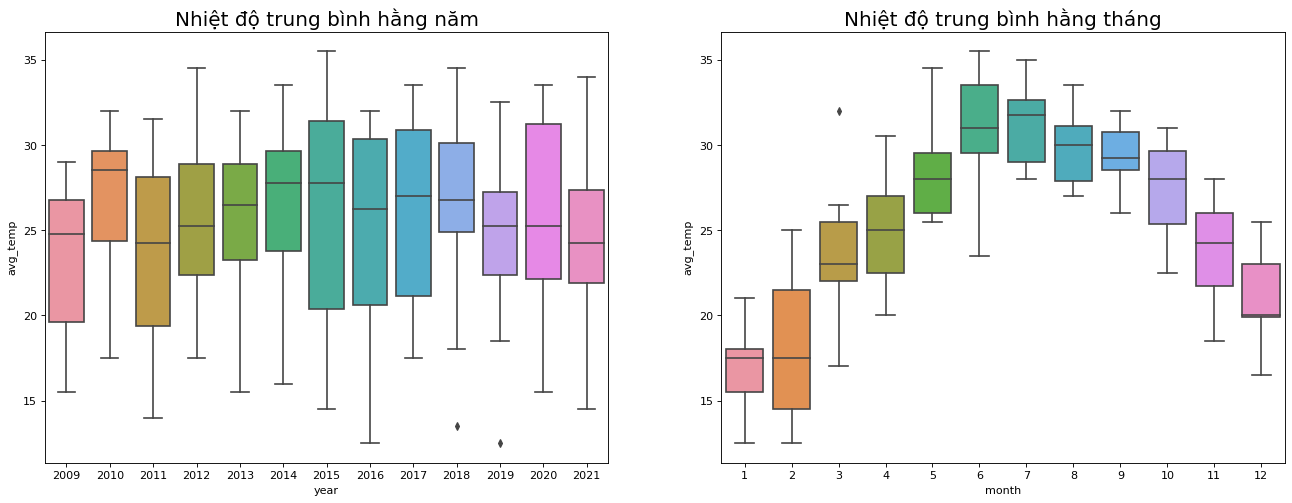

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='avg_temp', data=df, ax=axes[0])
sns.boxplot(x='month', y='avg_temp', data=df)

axes[0].set_title('Nhiệt độ trung bình hằng năm', fontsize=18); 
axes[1].set_title('Nhiệt độ trung bình hằng tháng', fontsize=18)
plt.show()

#### Đánh giá xu hướng nhiệt độ

- Năm 2010 và năm 2015 là 2 năm có nhiệt độ cao nhất vượt 40ºC.Năm 2015 là năm có nhiệt độ trung bình cao 
- Năm 2011 là năm có nhiệt độ thấp nhất khi nhiệt độ chỉ khoảng 11ºC
- Nhiệt độ cao nhất 3 năm gần nhất đang có xu hướng tăng dần 
- Từ tháng 5 đến tháng 9 là khoảng thời gian nóng nhất trong năm. Tháng có nhiệt độ cao nhất là tháng 6 >35ºC
- Mùa đông bắt đầu từ tháng 11 khi nhiệt độ bắt đầu giảm sâu kéo dài đến tháng 3 thì nhiệt độ bắt đầu tăng dễ chịu trở lại .Tháng có nhiệt độ thấp nhất là tháng 2 khi có những thời điểm <10ºC
- Năm 2015 tuy là năm có nhiệt độ trung bình cao nhất tuy nhiên vào mùa đông có những thời điểm nhiệt độ trung bình ~15ºC

### Xu hướng gió và hướng gió

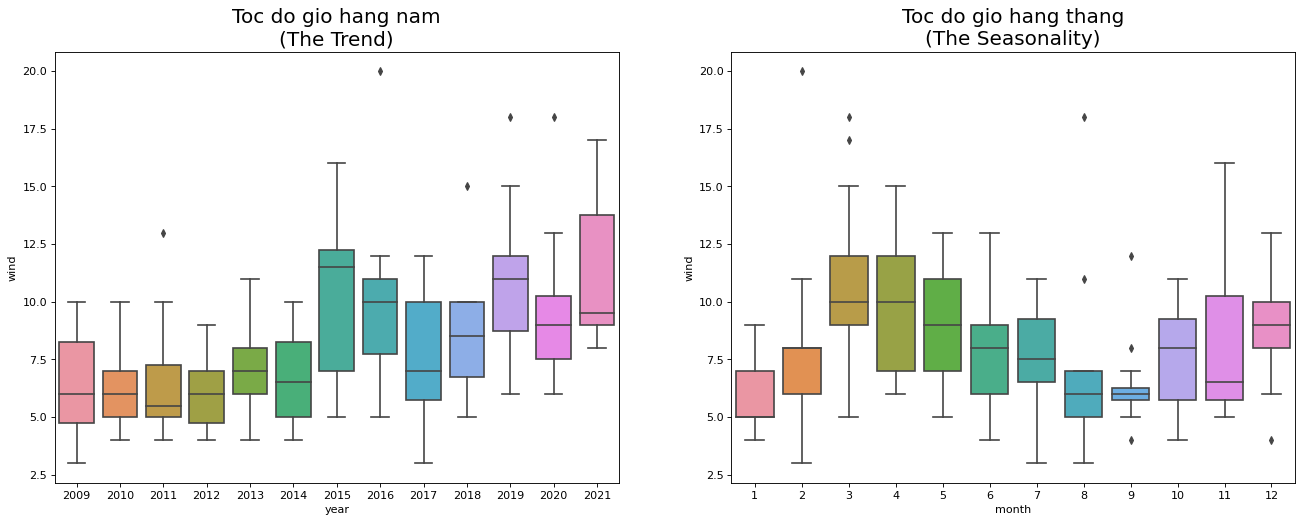

In [261]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='wind', data=df, ax=axes[0])
sns.boxplot(x='month', y='wind', data=df)

axes[0].set_title('Toc do gio hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Toc do gio hang thang\n(The Seasonality)', fontsize=18)
plt.show()

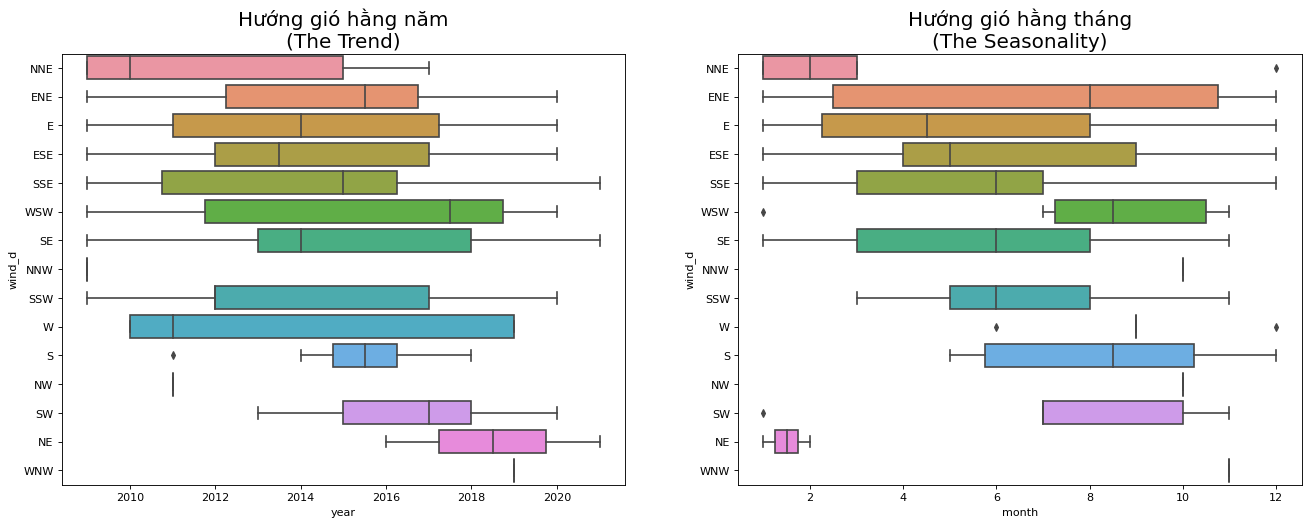

In [262]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='wind_d', data=df, ax=axes[0])
sns.boxplot(x='month', y='wind_d', data=df)

axes[0].set_title('Hướng gió hằng năm\n(The Trend)', fontsize=18); 
axes[1].set_title('Hướng gió hằng tháng\n(The Seasonality)', fontsize=18)
plt.show()

- tốc độ gió 2016-2018 có lượng gió cao tuy nhiên năm 2021 lại là năm có lượng gió cao đột biến nhất có thể do nhiệt độ có sự biến chuyển cao
 
- từ tháng 6- tháng 9 lượng gió cao đạt đỉnh điểm
- năm 2017 là năm duy nhật mà hướng gió NW đạt giá trị cao và có hướng gió WSW , năm 2015 là duy nhất mà hướng gió NNW và WSW có giá trị
- chỉ có các hướng gió NNE,ESE,ENE,SE là hướng gió phổ biến xuất hiện cả năm và chỉ có các hướng gió NNE,ESE,ENE,SE,S,E là hướng gió phổ biến ở tất cả các năm còn 1 số hướng gió ít phổ biến chỉ xuất hiện trong những thời điểm nhất định

### Xu hướng về lượng mưa , mây và độ ẩm

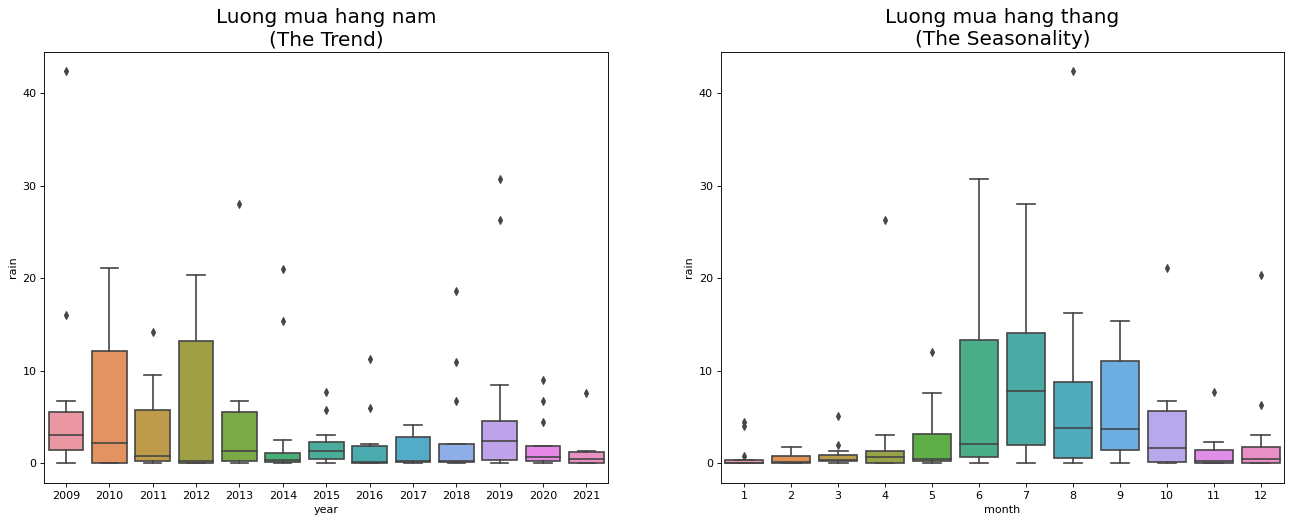

In [263]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='rain', data=df, ax=axes[0])
sns.boxplot(x='month', y='rain', data=df)

axes[0].set_title('Luong mua hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Luong mua hang thang\n(The Seasonality)', fontsize=18)
plt.show()

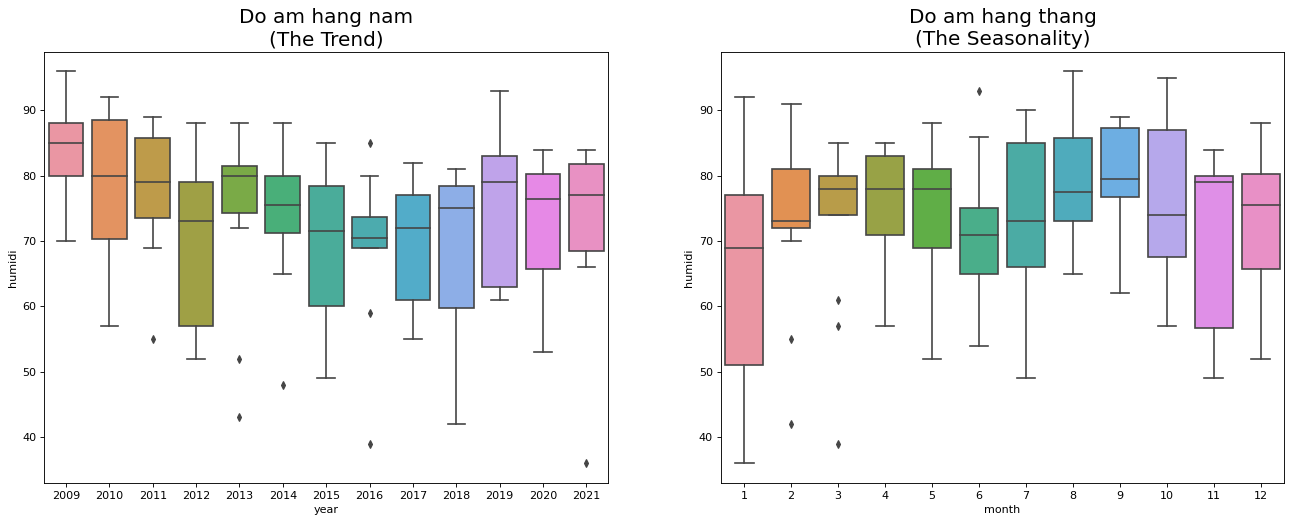

In [264]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='humidi', data=df, ax=axes[0])
sns.boxplot(x='month', y='humidi', data=df)

axes[0].set_title('Do am hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Do am hang thang\n(The Seasonality)', fontsize=18)
plt.show()

- lượng mưa năm 2017 được ghi nhận là tăng đột ngột cao nhất và năm 2013 và 2021 là 2 năm có lượng mưa trung bình thấp nhất 
- từ tháng 5 - tháng 9 được coi là mua mưa khi mà trong giai đoạn này lượng mưa được ghi nhận là rất tốt
- có thể do lượng mưa thấp mà năm 2021 và năm 2013 là 2 năm có độ ẩm trung bình thấp nhât và độ ẩm từ tháng 4 - tháng 9 là giai đoạn có độ ẩm cao nhất trong năm


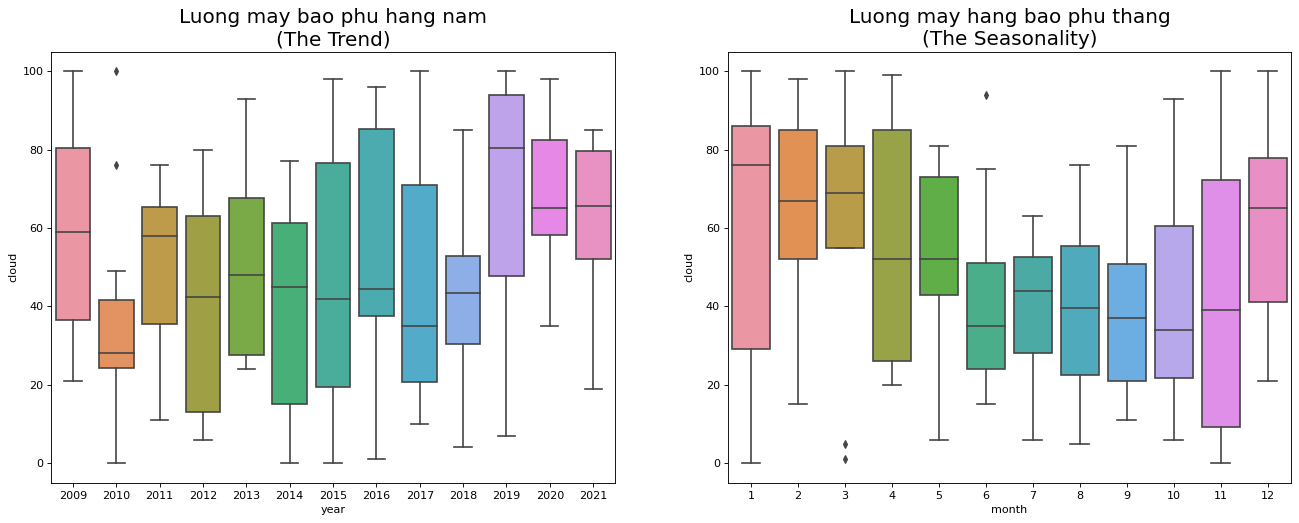

In [265]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='cloud', data=df, ax=axes[0])
sns.boxplot(x='month', y='cloud', data=df)

axes[0].set_title('Luong may bao phu hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Luong may hang bao phu thang\n(The Seasonality)', fontsize=18)
plt.show()

- các năm 2010-2013 và 2018-2019 là 2 giai đoạn có lượng mây bao phủ cao nhất từ tháng 10 - tháng 2 hằng năm có lượng mây bao phủ thấp nhất

### Xu hướng về áp xuất 

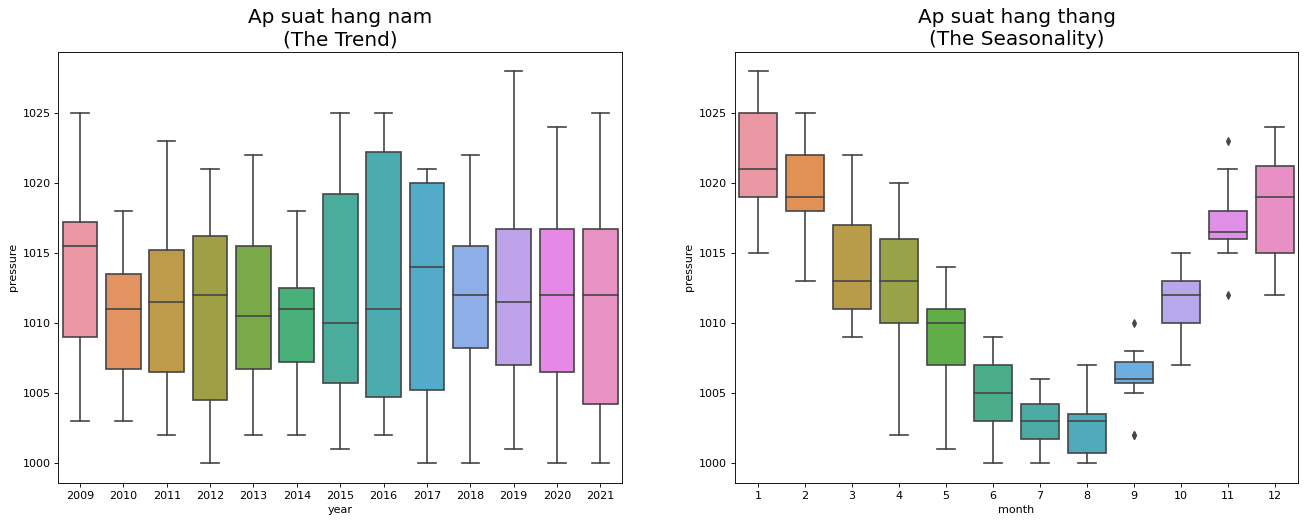

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='pressure', data=df, ax=axes[0])
sns.boxplot(x='month', y='pressure', data=df)

axes[0].set_title('Ap suat hang nam\n(The Trend)', fontsize=18); 
axes[1].set_title('Ap suat hang thang\n(The Seasonality)', fontsize=18)
plt.show()

- năm 2009 và năm 2018-2019 là 2 giai đoạn được ghi nhận là có lượng áp suất trong không khí cao nhất 
- từ tháng 9-tháng 2 là khoảng thời tiết đang trong giai đoạn mùa động nhiệt độ thấp nên lượng áp suất trong không khí lúc này cũng đạt ngưỡng cao nhất
- áp suất không khí đang có xu hướng tăng lên

## Các mối tương quan trong dữ liệu

### Nhiệt độ trung bình

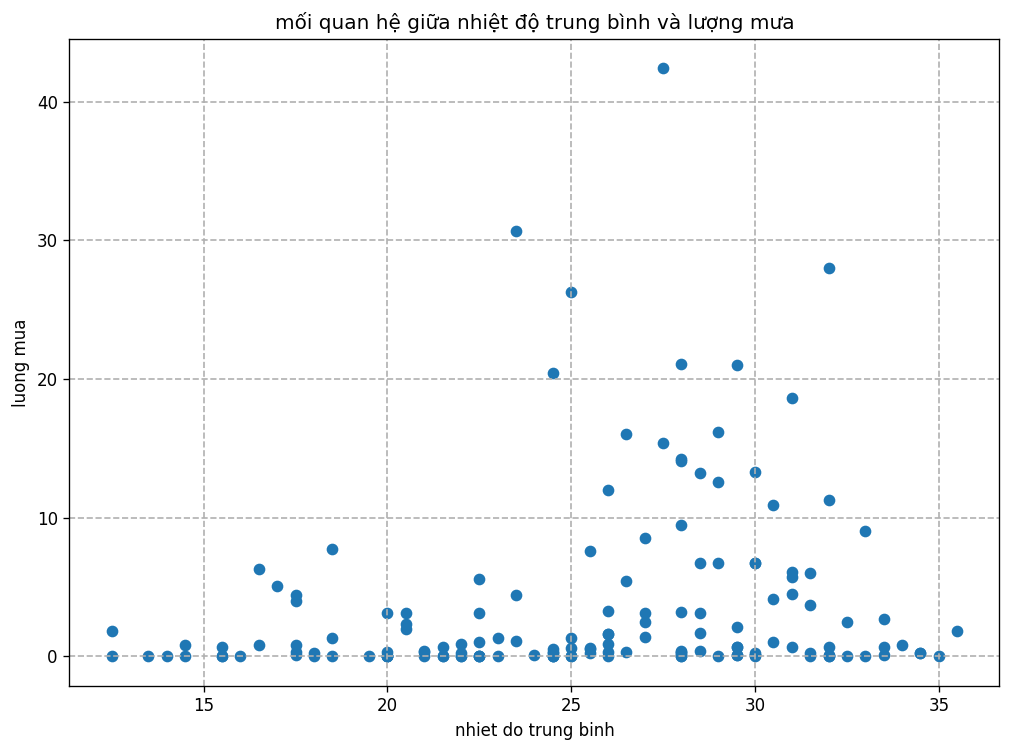

In [267]:
# Gán giá trị của cột avg_temp và cột rain vào biến x và y
x = df['avg_temp']
y = df['rain']

# Đặt tiêu đề cho biểu đồ
plt.title("mối quan hệ giữa nhiệt độ trung bình và lượng mưa")

# Vẽ biểu đồ phân tán với giá trị x và y cho trước
plt.scatter(x, y)

# Thêm lưới cho biểu đồ với kiểu đường và độ dày cho trước
plt.grid(linestyle = '--', linewidth = 1)

# Đặt nhãn trục x và trục y cho biểu đồ
plt.xlabel("nhiet do trung binh")
plt.ylabel("luong mua")

# Hiển thị biểu đồ
plt.show()


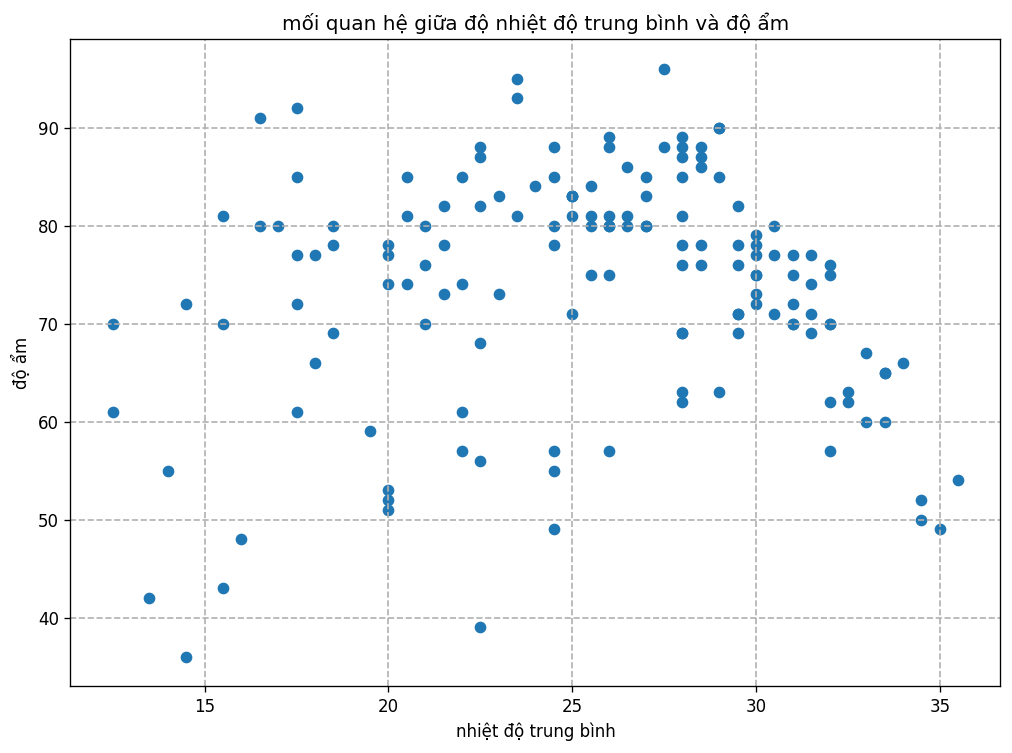

In [268]:
x = df['avg_temp']
y = df['humidi']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và độ ẩm")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("độ ẩm")
plt.show()

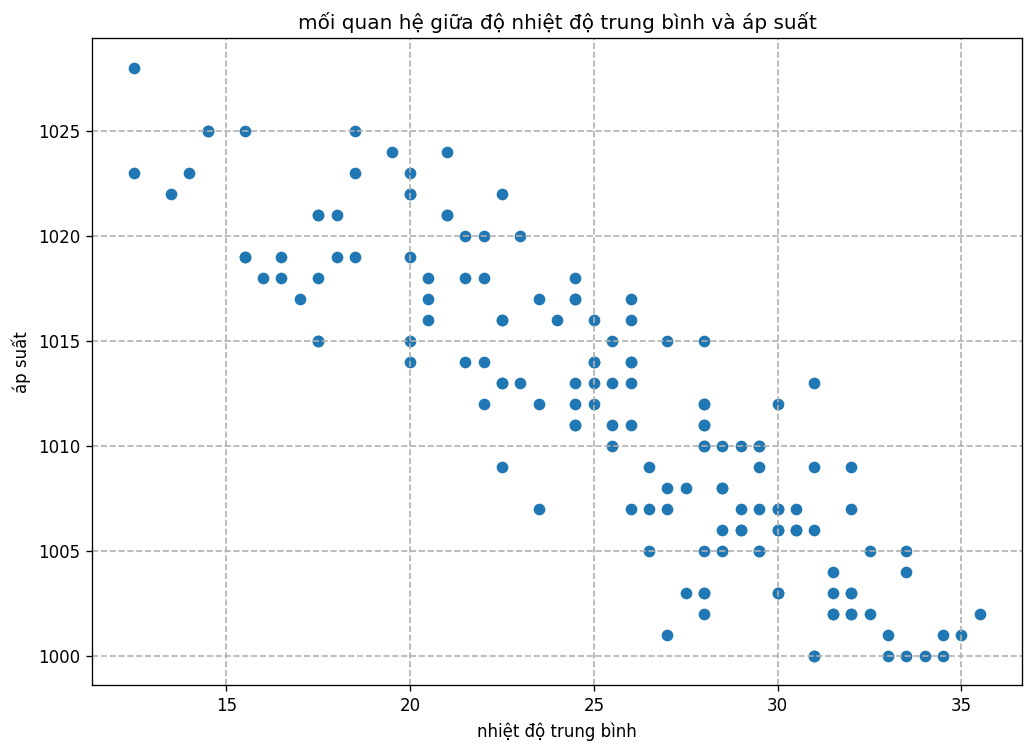

In [269]:
x = df['avg_temp']
y = df['pressure']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và áp suất")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("áp suất")
plt.show()

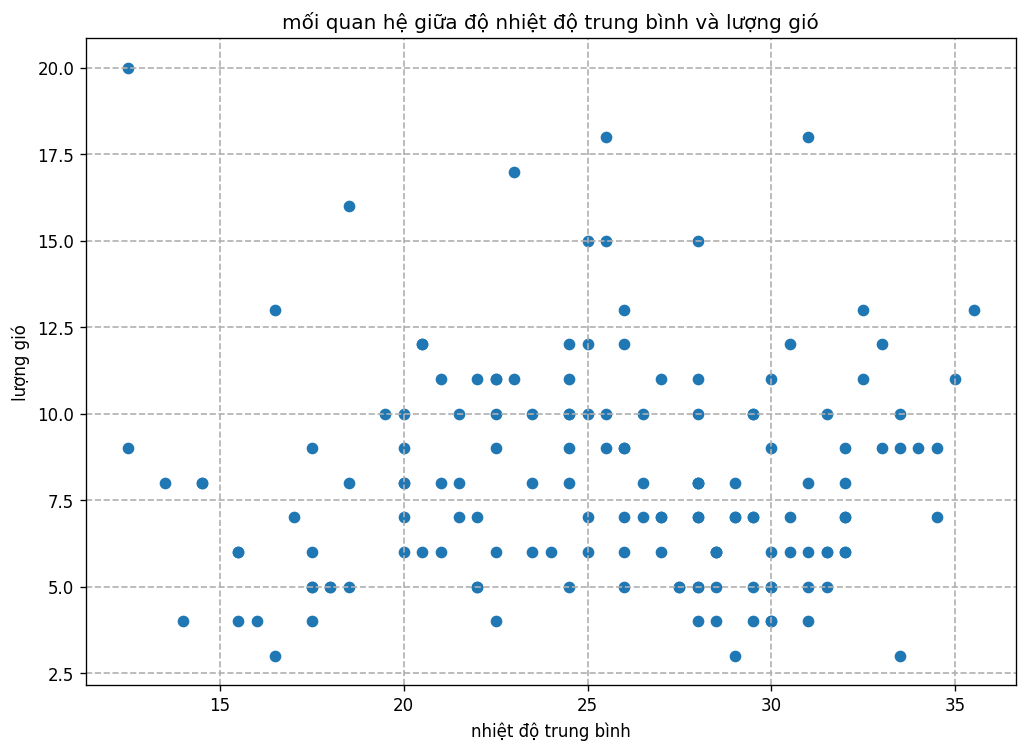

In [270]:
x = df['avg_temp']
y = df['wind']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và lượng gió")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("lượng gió")
plt.show()

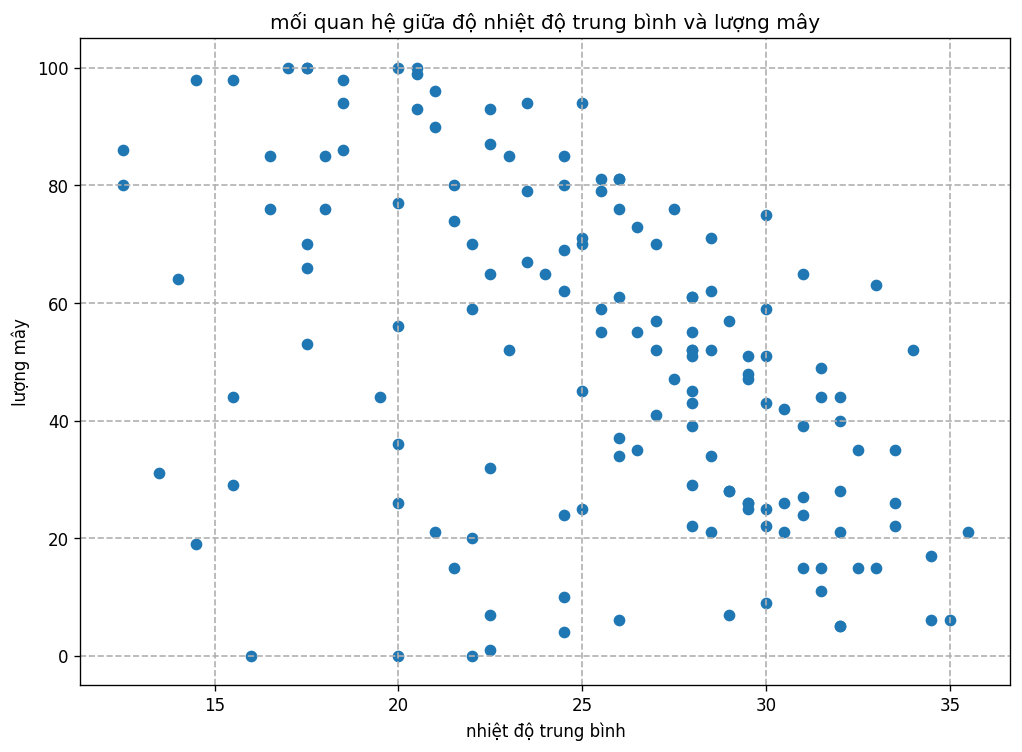

In [271]:
x = df['avg_temp']
y = df['cloud']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và lượng mây")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("nhiệt độ trung bình")
plt.ylabel("lượng mây")
plt.show()

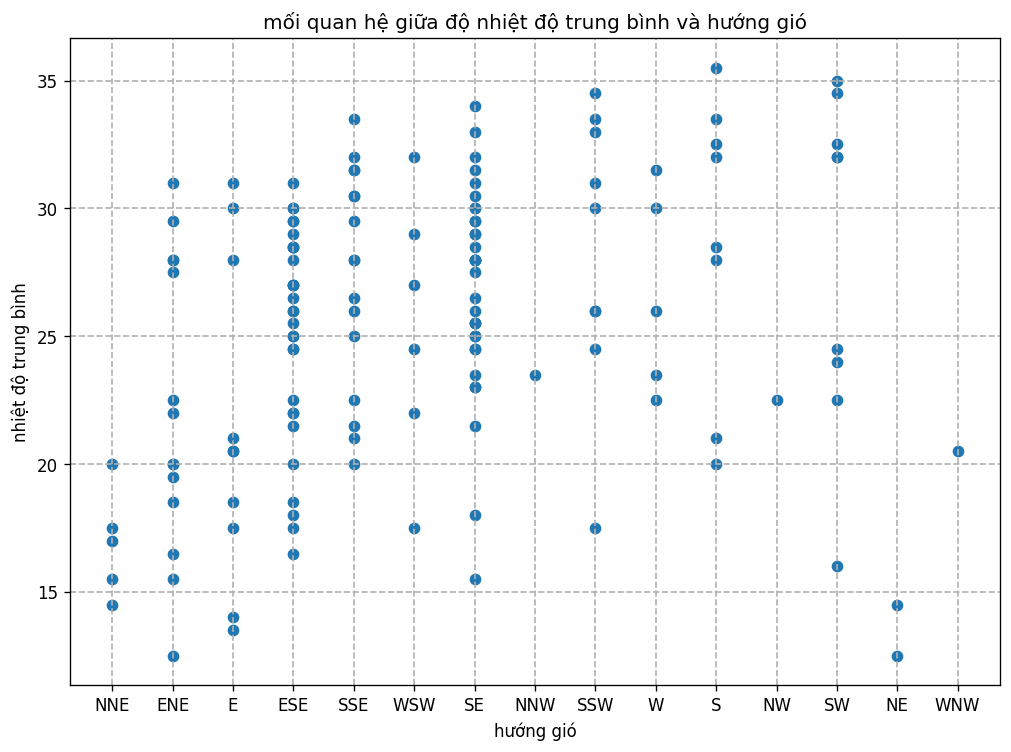

In [272]:
x = df['wind_d']
y = df['avg_temp']
plt.title("mối quan hệ giữa độ nhiệt độ trung bình và hướng gió")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("hướng gió")
plt.ylabel("nhiệt độ trung bình")
plt.show()

### Lượng mưa

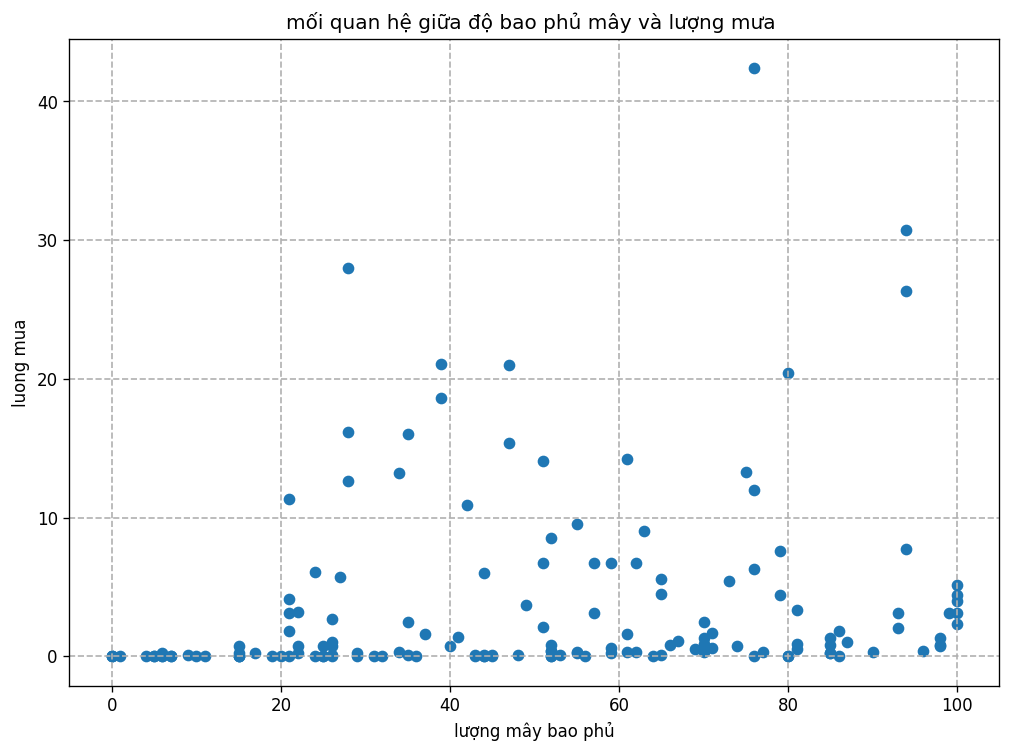

In [273]:
x = df['cloud']
y = df['rain']
plt.title("mối quan hệ giữa độ bao phủ mây và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("lượng mây bao phủ")
plt.ylabel("luong mua")
plt.show()

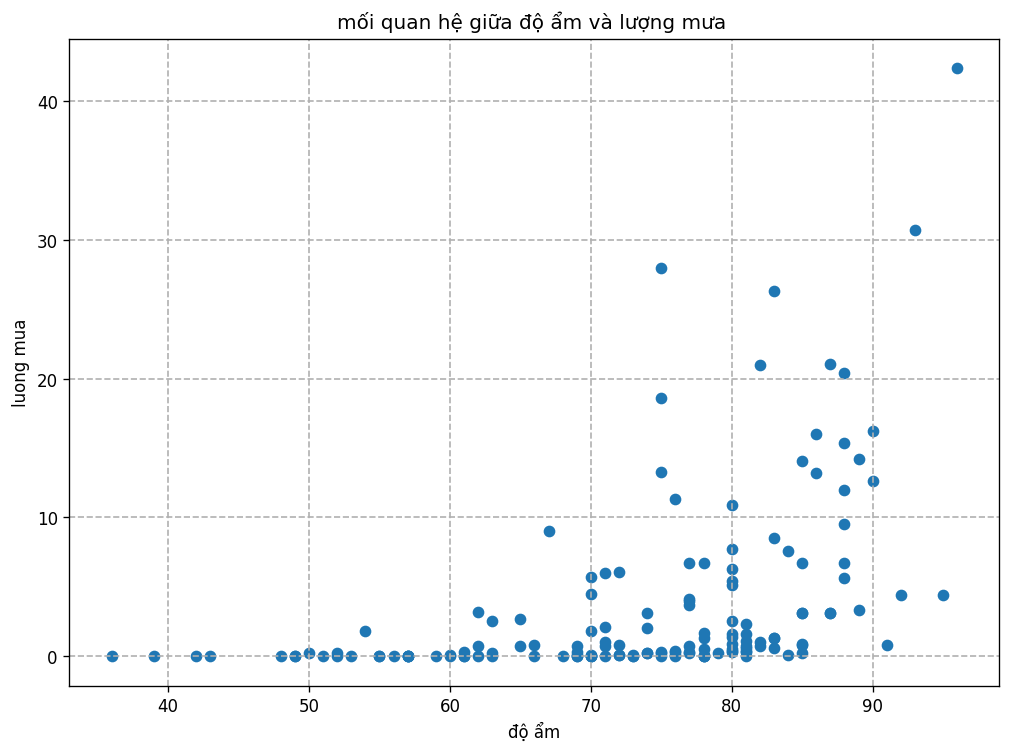

In [274]:
x = df['humidi']
y = df['rain']
plt.title("mối quan hệ giữa độ ẩm và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("độ ẩm")
plt.ylabel("luong mua")
plt.show()

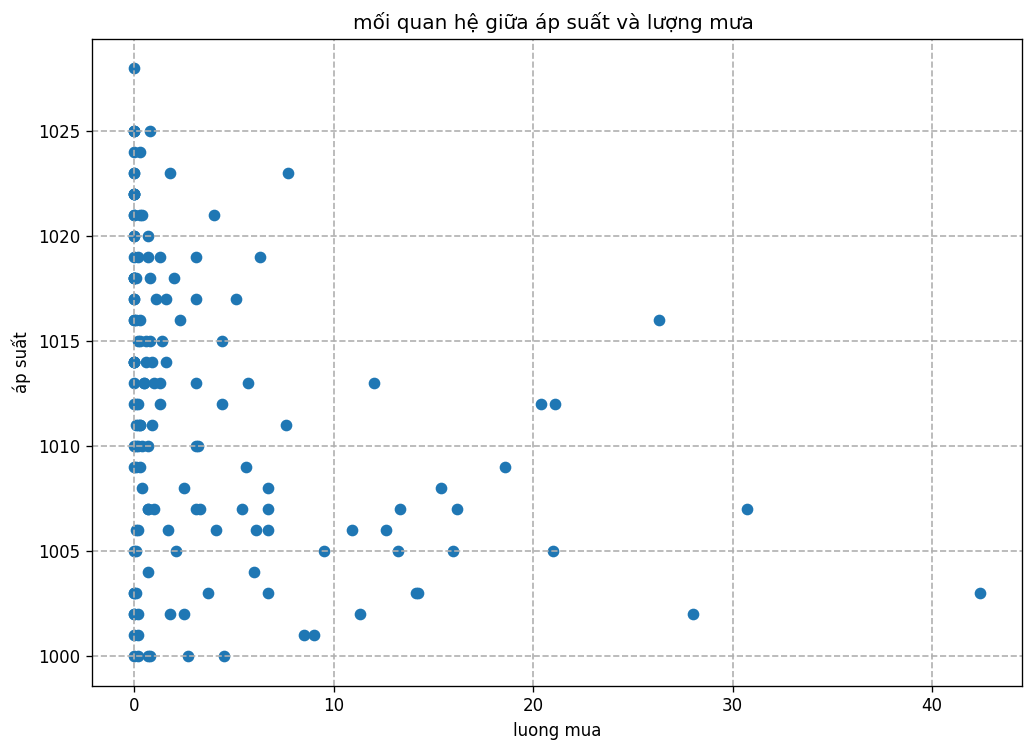

In [275]:
x = df['rain']
y = df['pressure']
plt.title("mối quan hệ giữa áp suất và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("luong mua")
plt.ylabel("áp suất")
plt.show()

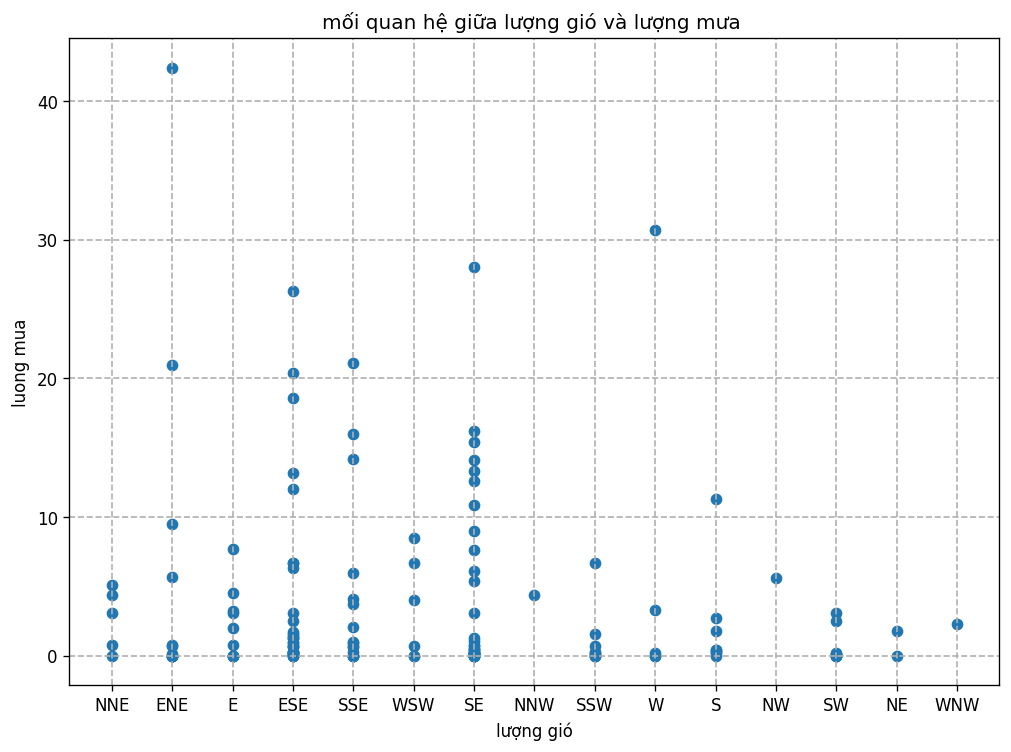

In [276]:
x = df['wind_d']
y = df['rain']
plt.title("mối quan hệ giữa lượng gió và lượng mưa ")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("lượng gió")
plt.ylabel("luong mua")
plt.show()

### gió

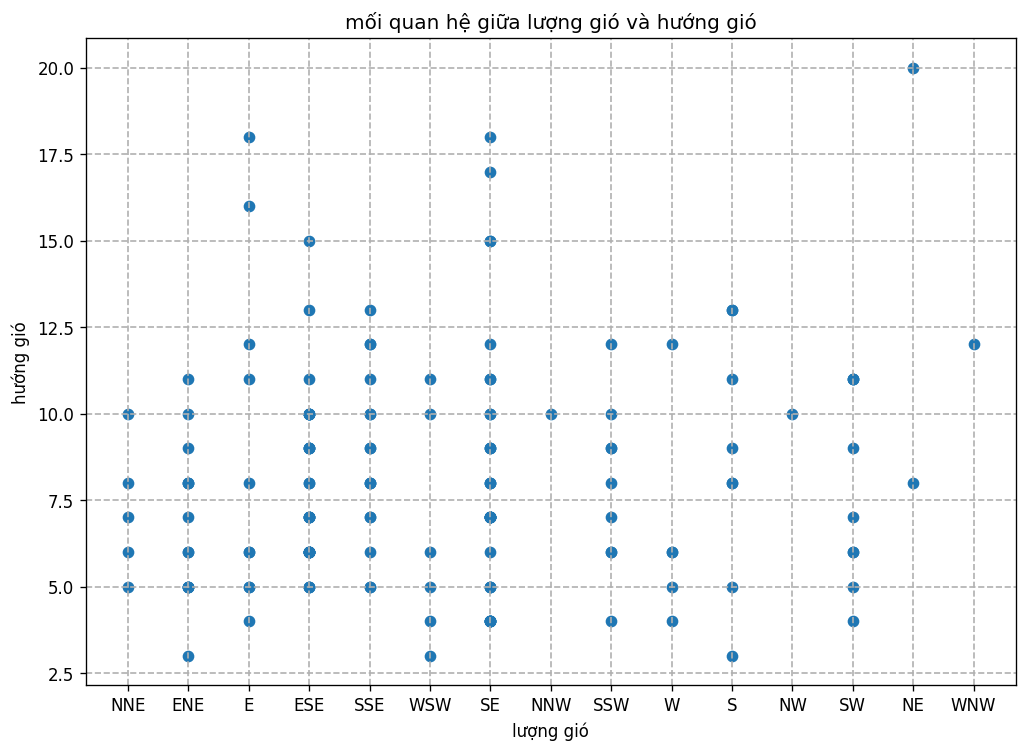

In [277]:
x = df['wind_d']
y = df['wind']
plt.title("mối quan hệ giữa lượng gió và hướng gió")
plt.scatter(x, y)
plt.grid(linestyle = '--', linewidth = 1)
plt.xlabel("lượng gió")
plt.ylabel("hướng gió")
plt.show()

## Đánh giá xu hướng khí hậu và sự ảnh hưởng

- Hà Nội có khí hậu nhiệt đới gió mùa ẩm, với mùa hè nóng và mưa nhiều, còn mùa đông lạnh và mưa ít. Nhiệt độ trung bình hàng năm là 23,6ºC, cao nhất là tháng 6 (29,8ºC), thấp nhất là tháng 1 (17,2ºC). Độ ẩm tương đối trung bình hàng năm là 79% và lượng mưa trung bình hàng năm là 1.800mm.

- Thập kỷ 2011-2020 vừa qua được ghi nhận là nóng nhất trong lịch sử.Nhiệt độ tăng lên làm gia tăng các bệnh gây ra do nhiệt độ cao và khiến việc thực hiện các công việc ngoài trời trở nên khó khăn hơn. Rủi ro cháy rừng cao hơn và lây lan nhanh hơn rất nhiều khi khí hậu nóng lên gây thiệt hại cho nông lâm nghiệp

- Tình trạng hạn hán ít mưa thường xuyên khéo dài ảnh hưởng đến mùa vụ và khiến hệ sinh thái càng dễ bị tổn thương. Khiến cho việc nguy cơ thiếu nguồn nước sạch hằng ngày. 

- lượng gió tốc độ gió đang tăng dần chứng tỏ những cơn bão lớn đang trở nên khốc liệt hơn có thể do sự biến đổi khí hậu

#Xử lý các dữ liệu ngoại lai

 Phương pháp STD

In [278]:
mean_value = df['max'].mean()
std_value = df['max'].std()

# Tính giới hạn dưới và trên
limit_std = 3 * std_value
lower_std, upper_std = mean_value - limit_std, mean_value + limit_std

# Tạo mặt nạ boolean để lọc các hàng thỏa mãn điều kiện lọc
mask = (df['max'] >= lower_std) & (df['max'] <= upper_std)
filtered_df = df[mask]

# Hiển thị DataFrame lọc
print('Dữ liệu sau khi xử lý ngoại lai:\n')
print(filtered_df)

Dữ liệu sau khi xử lý ngoại lai:

     province  max  min  wind wind_d  rain  humidi  cloud  pressure  \
0      Ha Noi   19   12     6    NNE   0.0      70     44      1025   
31     Ha Noi   19   14     3    ENE   0.8      91     85      1018   
59     Ha Noi   17   17     7    NNE   5.1      80    100      1017   
90     Ha Noi   24   17     6      E   3.1      85     99      1017   
120    Ha Noi   30   22     9    ESE   1.6      81     61      1014   
...       ...  ...  ...   ...    ...   ...     ...    ...       ...   
4411   Ha Noi   24   19    10    SSE   0.0      78     80      1018   
4439   Ha Noi   26   20    17     SE   1.3      83     85      1013   
4470   Ha Noi   32   24    15     SE   0.0      76     52      1002   
4500   Ha Noi   28   23     9     SE   7.6      84     79      1011   
4531   Ha Noi   39   29     9     SE   0.8      66     52      1000   

           date  year  month  avg_temp  
0    2009-01-01  2009      1      15.5  
31   2009-02-01  2009      2   

# Phát triển các mô hình học máy

## Mô hình Arima cho nhiệt độ cao nhất

In [279]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
import os 
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [280]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [281]:
from pmdarima import auto_arima

In [282]:
from datetime import datetime


In [283]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
df = pd.read_csv("Data.csv", index_col="date", parse_dates=True, date_parser=dateparse)
df.head(12)

province  max  min  wind wind_d  rain  humidi  cloud  pressure
date                                                                     
2009-01-01   Ha Noi   19   12     6    NNE   0.0      70     44      1025
2009-01-02   Ha Noi   18   12     6    ESE   0.5      65     28      1025
2009-01-03   Ha Noi   20   13     5    ESE   0.7      74     40      1022
2009-01-04   Ha Noi   25   12     5    SSW   0.0      81     46      1018
2009-01-05   Ha Noi   23   14     5      S   1.3      90     75      1017
2009-01-06   Ha Noi   23   15     5      E   2.2      88     59      1018
2009-01-07   Ha Noi   15   13     9    NNE   1.1      85     95      1023
2009-01-08   Ha Noi   15   12     8      E   0.5      78     91      1026
2009-01-09   Ha Noi   19   11    10     SE   0.1      61     23      1029
2009-01-10   Ha Noi   22    8     6    ENE   0.0      50      2      1027
2009-01-11   Ha Noi   23    8     4      E   0.0      46      1      1024
2009-01-12   Ha Noi   22    9     6     SE   0.0      51      5      1028

In [284]:
df['max'].isnull().sum()

0

<Axes: xlabel='date'>

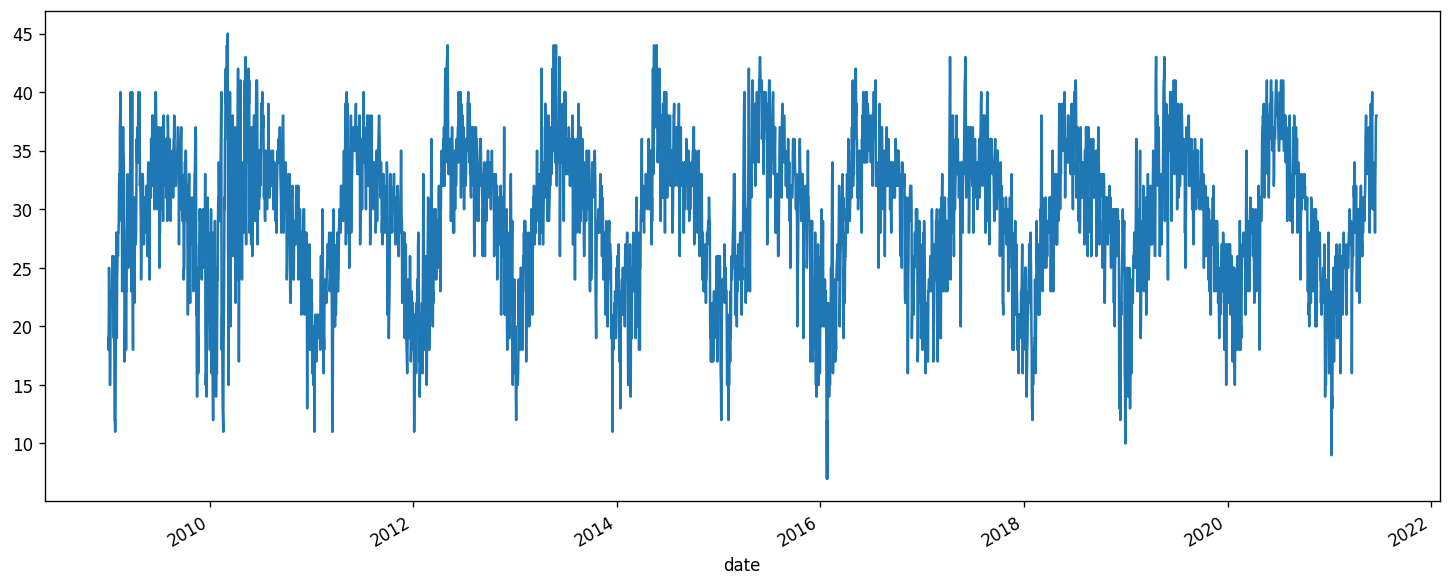

In [285]:
df['max'].plot(figsize = (15,6))

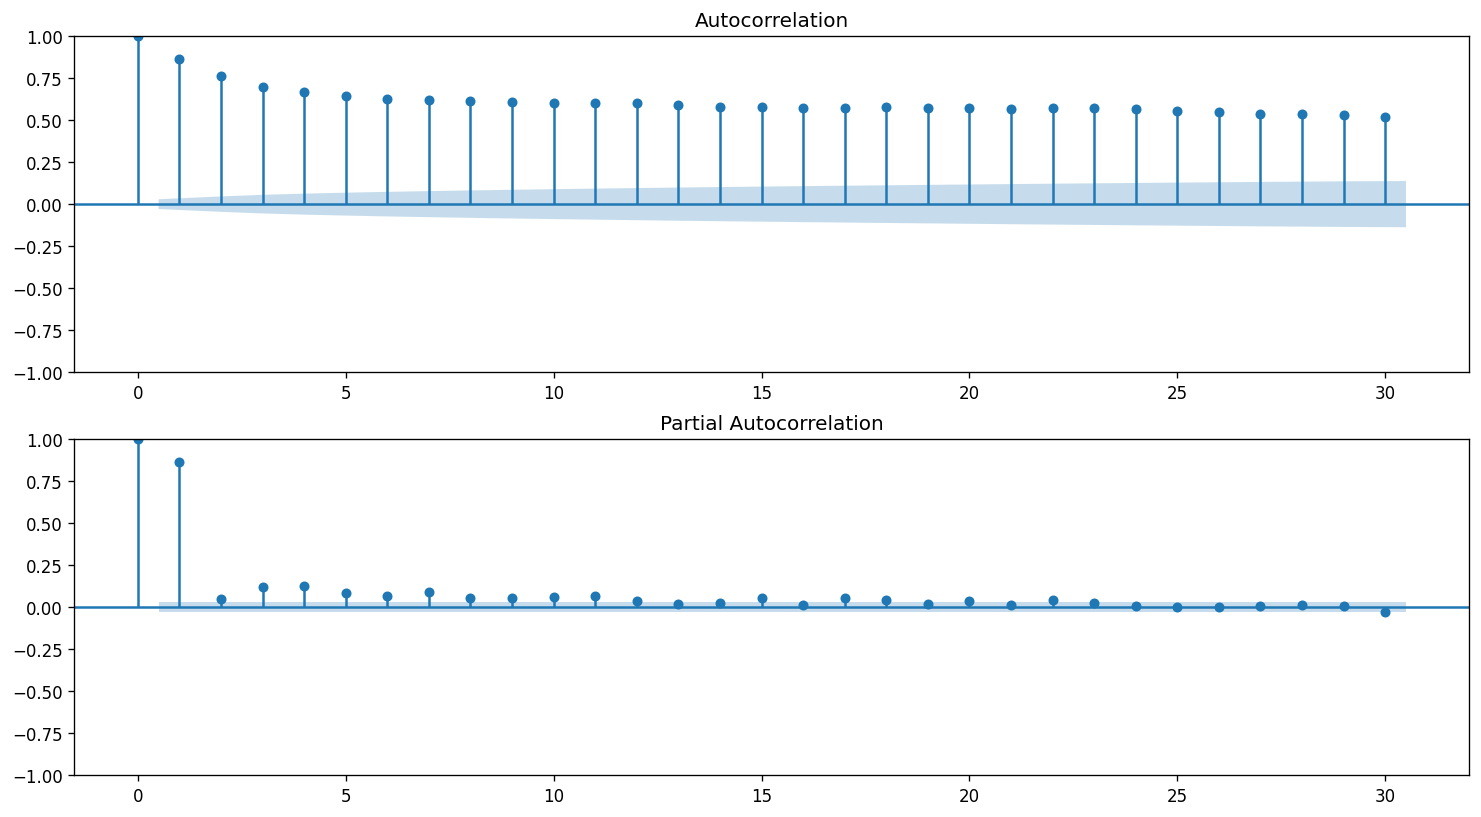

In [286]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(df['max'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(df['max'], ax=plt.gca(), lags=30, method='ywm')
plt.show()

In [287]:
ts_log = np.log(df['max'])

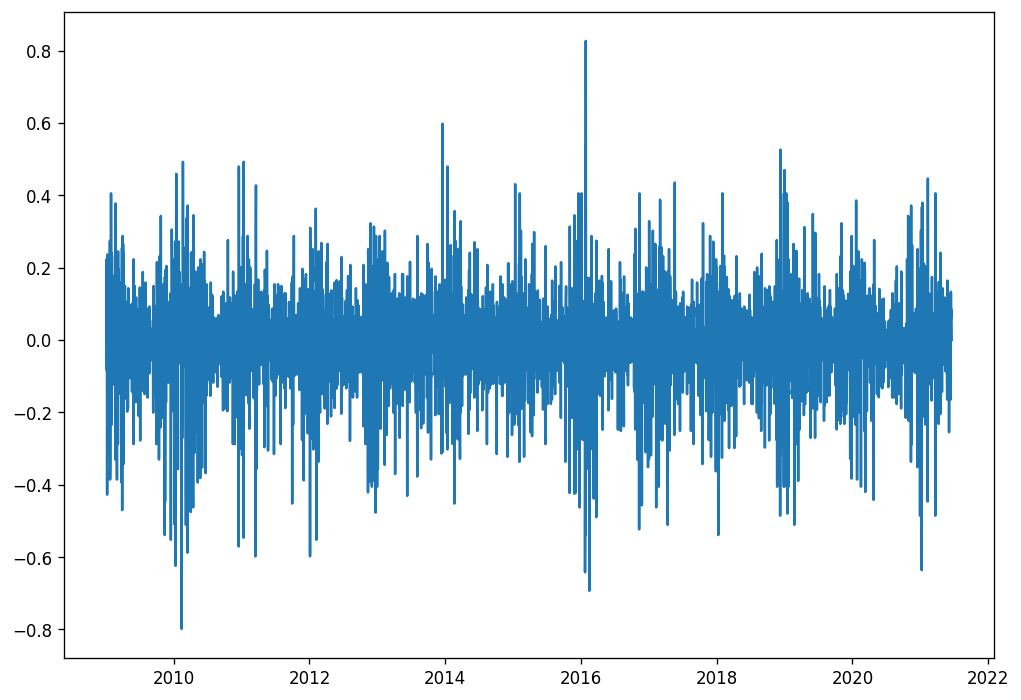

In [288]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [289]:
ts = df['max'] - df['max'].shift()
ts.dropna(inplace=True)

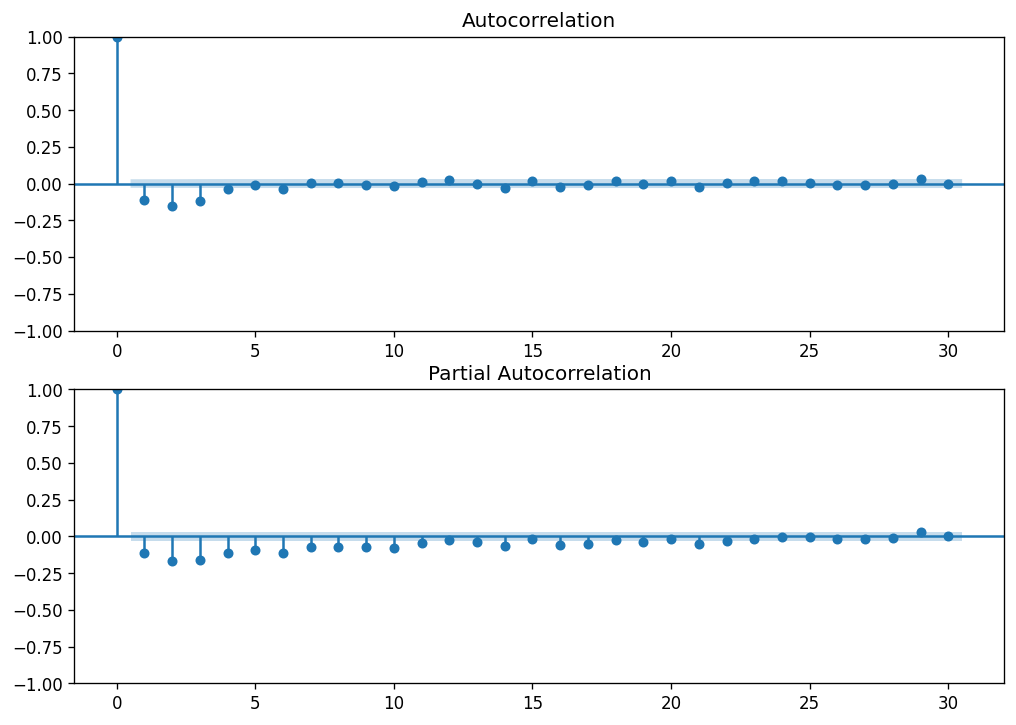

In [290]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=30, method='ywm')
plt.show()


In [291]:
print(df.shape)

(4549, 9)


In [292]:
train = df.iloc[ :-1735]
test = df.iloc[-1735: ]

print(train.shape)
print(test.shape)

(2814, 9)
(1735, 9)


In [293]:
from pmdarima.arima import auto_arima 
model = auto_arima(df['max'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df['max'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22928.337, Time=11.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29538.293, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23264.031, Time=2.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26220.724, Time=2.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=43897.417, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23115.062, Time=7.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=23030.625, Time=15.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=22951.952, Time=17.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=22926.487, Time=10.47 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=22967.813, Time=7.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=22932.268, Time=7.65 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=22932.262, Time=12.88 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=22937.248, Time=8.12 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=22929.662, Time=11.00 sec
 ARIMA(2,0,3)

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True)

In [294]:
model = ARIMA(df['max'], order=(2, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [295]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    max   No. Observations:                 4549
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11463.156
Date:                Mon, 12 Jun 2023   AIC                          22934.312
Time:                        15:51:06   BIC                          22960.002
Sample:                             0   HQIC                         22943.359
                               - 4549                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6676      0.015     44.626      0.000       0.638       0.697
ar.L2         -0.0899      0.014     -6.261      0.000      -0.118      -0.062
ma.L1         -0.9107      0.008   -113.433      0.000      -0.926      -0.895
sigma2         9.0514      0.140     64.826      0.000       8.778       9.325
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1201.44
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [296]:
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start = start , end = end , typ = "levels")
print(pred)
pred.index = df.index[start : end + 1]
print(pred)

date
2016-09-17    33.470775
2016-09-18    33.518021
2016-09-19    33.561049
2016-09-20    32.843411
2016-09-21    31.433614
                ...    
2021-06-14    29.299312
2021-06-15    32.660001
2021-06-16    33.755226
2021-06-17    35.867804
2021-06-18    36.456077
Name: predicted_mean, Length: 1735, dtype: float64
date
2016-09-17    33.470775
2016-09-18    33.518021
2016-09-19    33.561049
2016-09-20    32.843411
2016-09-21    31.433614
                ...    
2021-06-14    29.299312
2021-06-15    32.660001
2021-06-16    33.755226
2021-06-17    35.867804
2021-06-18    36.456077
Name: predicted_mean, Length: 1735, dtype: float64


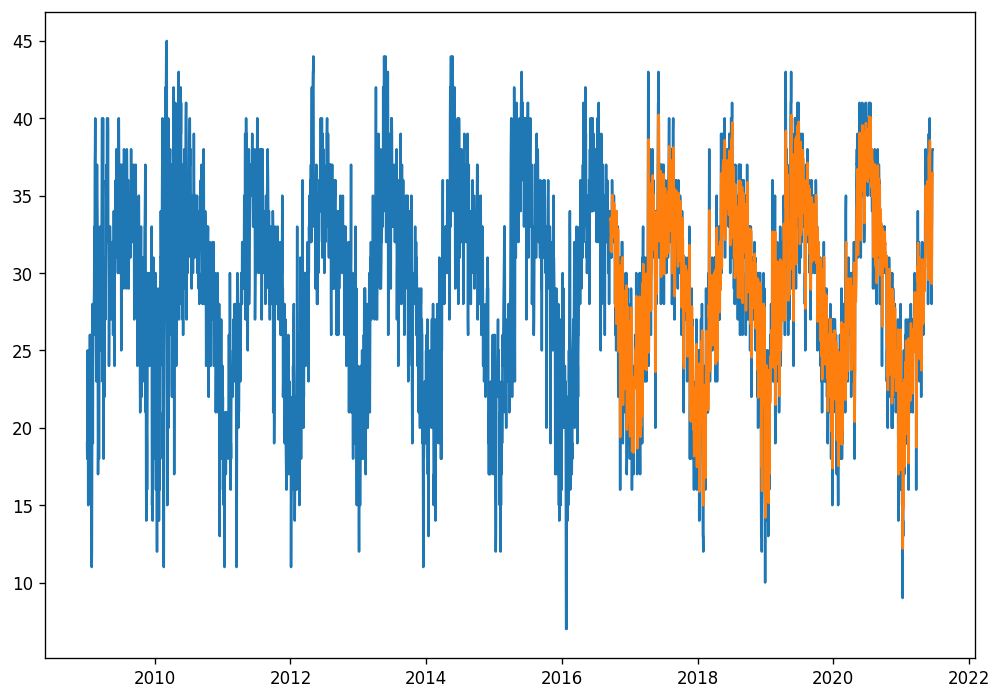

In [297]:
plt.plot(df['max'])
plt.plot(pred)

In [298]:
rmse = sqrt(mean_squared_error(pred,test['max']))
print(rmse)

2.8283932689412876


- sai số của chương trình học máy ARIMAX là 2.8280292132543483

## Mô Hình hồi quy tuyến tính

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


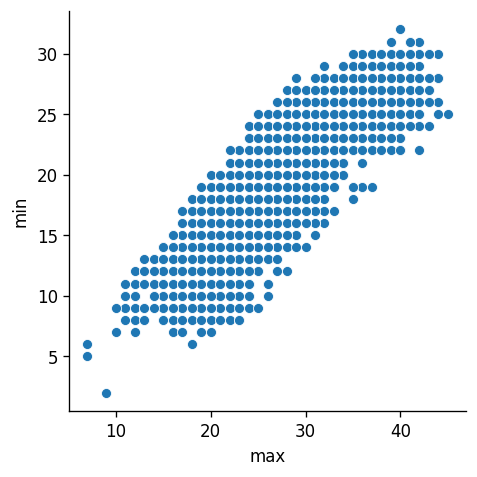

In [299]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['max'] , y_vars=['min'], size=4, aspect=1, kind='scatter')
plt.show()

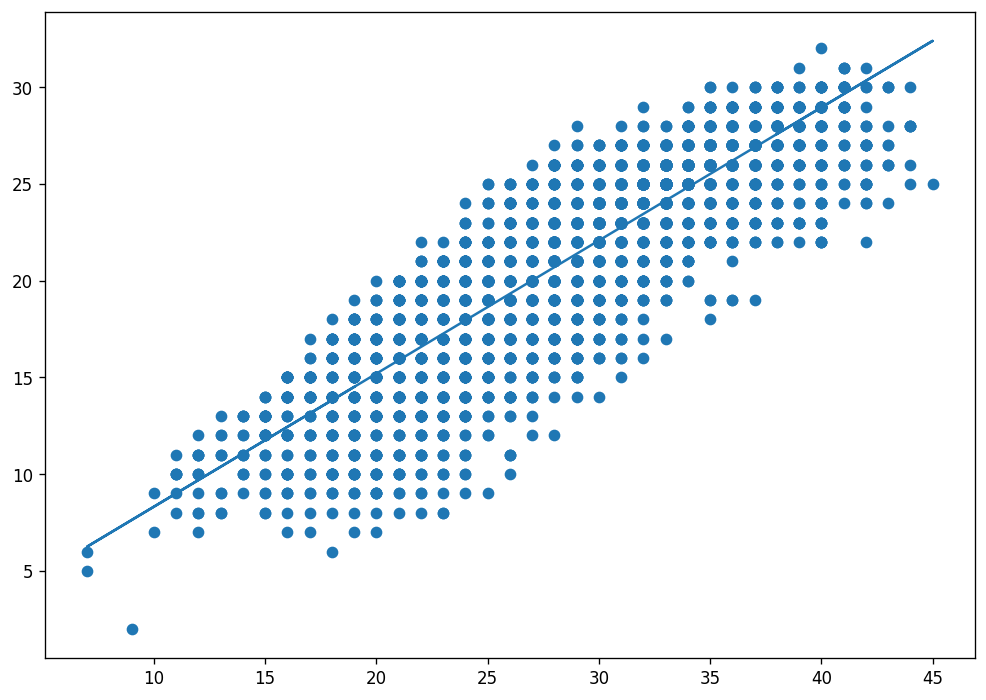

In [300]:
from scipy import stats

x = df['max']
y = df['min']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [320]:
x = df['max']
y = df['min']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

dudoan = myfunc(10)

print(dudoan)

8.314787461095541


In [302]:
X = df['max']
y = df['min']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 1)

In [303]:
X_train
y_train

date
2013-08-31    26
2012-05-25    25
2018-10-27    24
2010-02-20    10
2017-01-15    15
              ..
2016-12-07    17
2016-07-28    24
2011-06-25    25
2019-11-27    21
2009-08-24    25
Name: min, Length: 3184, dtype: int64

In [304]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [305]:
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    1.301078
max      0.691520
dtype: float64

In [306]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    min   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:51:07   Log-Likelihood:                -7347.0
No. Observations:                3184   AIC:                         1.470e+04
Df Residuals:                    3182   BIC:                         1.471e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3011      0.208      6.256      0.000       0.893       1.709
max            0.6915      0.007    100.150      0.000       0.678       0.705
==============================================================================
Omnibus:                      219.925   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.700
Skew:                          -0.649   Prob(JB):                     3.69e-60
Kurtosis:                       3.613   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

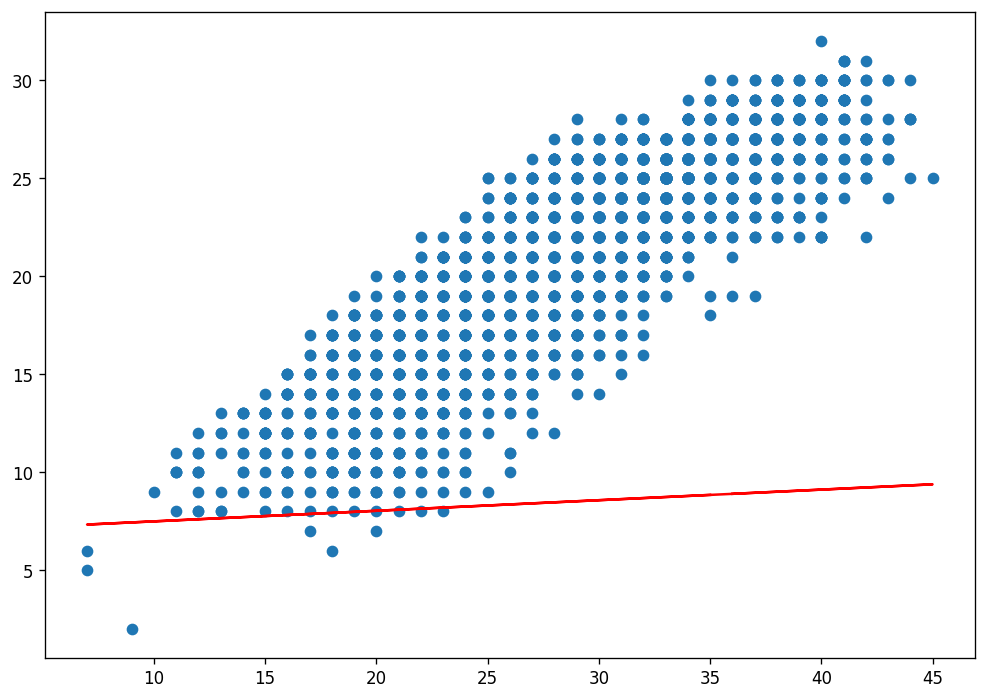

In [307]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [308]:
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

<ipython-input-309-8f8e8daad6e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


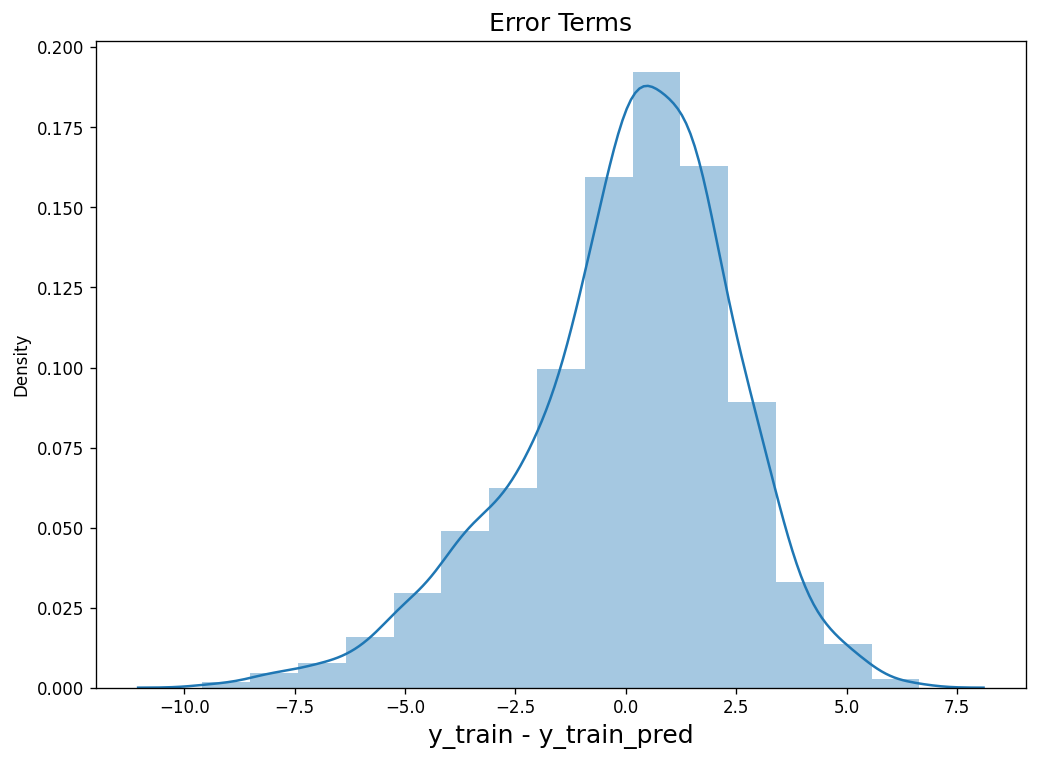

In [309]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

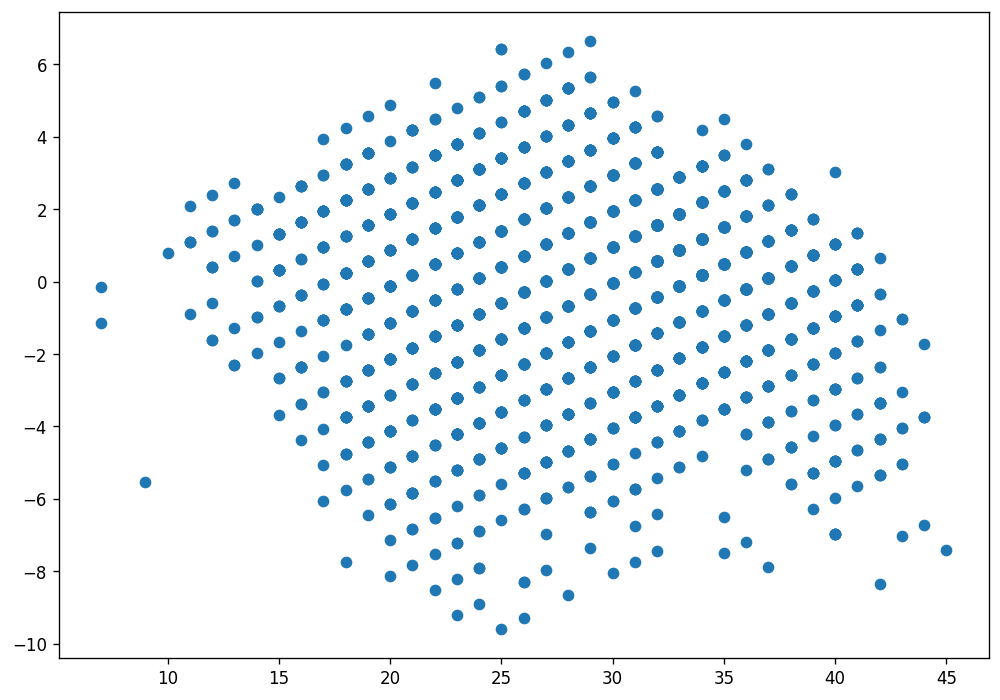

In [310]:
plt.scatter(X_train,res)
plt.show()

In [311]:
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

date
2016-06-15    28.961861
2011-02-27    18.589068
2017-08-01    26.887303
2013-09-21    24.812744
2010-12-31    17.897548
                ...    
2010-10-05    18.589068
2014-05-12    24.121224
2020-12-02    17.206028
2019-01-24    16.514509
2018-11-30    19.972107
Length: 1365, dtype: float64

In [312]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.755337472425732

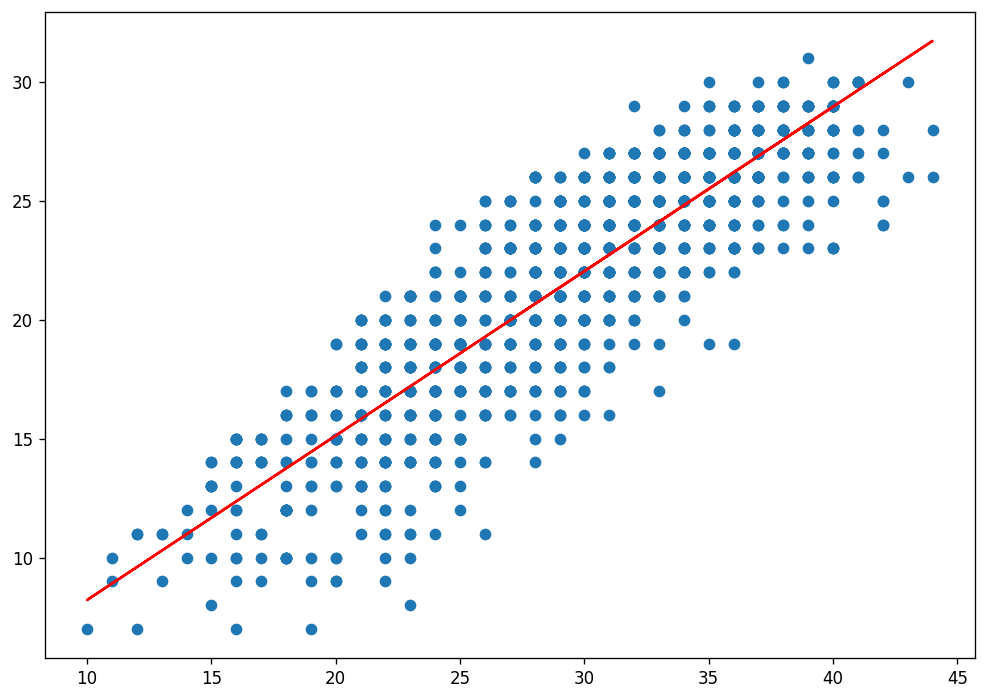

In [313]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [314]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)

In [315]:
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(3184, 1)
(1365, 1)


In [316]:

from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [317]:
print("Intercept :",lm.intercept_)

print('Slope :',lm.coef_)

Intercept : 1.3051333955758295
Slope : [0.69260373]


In [318]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

-0.7445143904843314
-0.7952299802010128
